**1. Problem Definition**

- Objective: Prediksi harga jual kendaraan (selling_price) menggunakan Linear Regression.

- Pendekatan: Buat model prediksi berbasis supervised learning dengan algoritma Linear Regression.

- Target Output: Model yang akurat dalam memprediksi harga jual kendaraan.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2. Data Collection**

Dataset: Vehicle Dataset berisi fitur-fitur:

Fitur Numerik: year, km_driven, mileage, engine, max_power, seats.

Fitur Kategorikal: fuel, seller_type, transmission, owner.

Target: selling_price

**2. Data Collection**


Dataset:
Dataset yang digunakan dalam proyek ini berasal dari Kaggle dengan nama Vehicle Dataset. Dataset ini berisi informasi tentang kendaraan yang dapat digunakan untuk memprediksi harga jual kendaraan. Kolom-kolom dalam dataset ini terbagi menjadi dua jenis fitur: numerik dan kategorikal, serta kolom target yang ingin diprediksi.


Fitur Numerik:

Fitur-fitur numerik dalam dataset ini mencakup:

year: Tahun pembuatan kendaraan.

km_driven: Jarak tempuh kendaraan (dalam satuan kilometer).

mileage: Efisiensi bahan bakar kendaraan (berapa kilometer kendaraan dapat menempuh per liter bahan bakar).

engine: Kapasitas mesin kendaraan dalam liter.

max_power: Daya maksimum kendaraan dalam satuan tenaga kuda (horsepower).

seats: Jumlah kursi atau kapasitas penumpang kendaraan.

Fitur Kategorikal:

Fitur-fitur kategorikal dalam dataset ini meliputi:

fuel: Jenis bahan bakar yang digunakan kendaraan (misalnya, bensin, diesel, dll.).

seller_type: Tipe penjual kendaraan (misalnya, dealer atau individu).

transmission: Jenis transmisi kendaraan (misalnya, manual atau otomatis).

owner: Jumlah pemilik kendaraan sebelumnya (misalnya, 1st owner, 2nd owner, dll.).

Target:
Kolom target yang ingin diprediksi adalah selling_price, yaitu harga jual kendaraan. Model yang akan dibuat bertujuan untuk memprediksi nilai harga jual kendaraan berdasarkan fitur-fitur yang ada di dataset ini.

Dataset ini diambil dari Kaggle dan menjadi dasar untuk analisis dan pembuatan model prediksi harga jual kendaraan menggunakan algoritma Linear Regression.

In [ ]:
# Import data
car = pd.read_csv('/content/car_details.csv')
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


**3. Data Cleaning**

Data cleaning merupakan tahap penting dalam proyek data science untuk memastikan bahwa dataset siap digunakan dalam model prediksi. Berikut adalah langkah-langkah yang Anda lakukan dalam tahap ini:


- Menghapus Kolom name dan owner:


Kolom name dan owner dihapus karena tidak relevan dengan model prediksi harga jual kendaraan. Kolom name biasanya berisi nama kendaraan, yang tidak memberikan informasi numerik atau kategorikal yang dapat digunakan untuk prediksi. Kolom owner juga dihapus karena sudah terwakili oleh fitur owner dalam bentuk kategorikal (misalnya, jumlah pemilik pertama, kedua, dll.).

- Cek Missing Value dan Hapus Baris Null dan NaN:

Pada tahap ini, Anda memeriksa dataset untuk nilai yang hilang (missing values), yang bisa berupa NaN (Not a Number) atau Null. Baris yang mengandung nilai kosong ini dihapus agar tidak memengaruhi model. Baris yang memiliki kolom penting tanpa nilai (misalnya, selling_price) akan dihapus, karena tidak dapat digunakan dalam perhitungan prediksi.

- Cek dan Hapus Baris Duplicate:

Anda juga memeriksa apakah ada baris duplikat dalam dataset. Baris yang duplikat akan dihapus untuk menghindari distorsi dalam model, karena baris yang sama dapat memberikan bobot berlebihan pada data.

- Mengecek dan Menyesuaikan Tipe Data dari Masing-Masing Kolom:

Di sini, Anda memeriksa tipe data pada setiap kolom untuk memastikan semuanya sesuai dengan tipe data yang benar. Misalnya, kolom numerik seperti year, km_driven, dan selling_price harus memiliki tipe data numerik (integer atau float), sedangkan kolom kategorikal seperti fuel, seller_type, dan transmission harus bertipe data kategori atau string.

- Cek Nilai yang Tidak Valid dan Sesuaikan year (Tahun):

Anda mengecek kolom year untuk memastikan tidak ada nilai tahun yang tidak valid, seperti tahun yang lebih besar dari tahun saat ini. Tahun yang lebih besar dari tahun sekarang akan disesuaikan atau dihapus, karena tidak mungkin ada kendaraan yang diproduksi di masa depan.

- Handle Categorical Data:

Data kategorikal seperti fuel, seller_type, dan transmission perlu dibersihkan dari kesalahan ketik (typos). Anda memastikan bahwa nilai-nilai dalam kolom tersebut konsisten dan tidak ada kategori yang tidak valid atau aneh. Misalnya, memastikan bahwa semua nilai pada kolom fuel adalah salah satu kategori yang valid, seperti petrol, diesel, atau CNG, dan tidak ada variasi ketik seperti diesal atau ptrol.

- Periksa Nilai Unik untuk Memastikan Tidak Ada Kategori yang Aneh:

Anda juga memeriksa nilai unik dalam kolom kategorikal untuk memastikan bahwa semua kategori yang ada sesuai dengan yang diharapkan. Jika ada nilai yang tidak biasa atau tidak sesuai, Anda akan membersihkannya atau menggantinya dengan kategori yang benar.

- Mengatasi Outlier dan Visualisasinya dengan Boxplot:

Outlier adalah nilai ekstrem yang mungkin tidak representatif dari data yang sebenarnya. Anda memeriksa fitur numerik untuk menemukan nilai-nilai yang jauh lebih tinggi atau lebih rendah dari rentang normal. Untuk mengatasi outlier, Anda bisa memilih untuk menghapus baris tersebut atau mengubah nilai outlier dengan nilai yang lebih wajar.
Visualisasi outlier menggunakan boxplot untuk melihat distribusi data dan mendeteksi nilai yang berada di luar batas normal (misalnya, nilai yang berada di luar whiskers boxplot). Boxplot memberikan gambaran yang jelas tentang sebaran data dan membantu mengidentifikasi outlier.

**Menghapus Kolom name dan owner**

In [ ]:
# Hapus kolom yang kurang relevan
car.drop(columns=['name', 'owner'], inplace=True)

# Cek dataset setelah kolom dihapus
car.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Cek Missing Value dan Hapus Baris Null dan NaN**

In [ ]:
# Cek missing values
car.isnull().sum()


,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
mileage,221
engine,221
max_power,215
torque,222


In [ ]:
# Hapus baris yang memiliki nilai null atau NaN pada kolom yang relevan
car = car[~car['mileage'].isnull()]
car = car[~car['engine'].isnull()]
car = car[~car['max_power'].isnull()]
car = car[~car['torque'].isnull()]
car = car[~car['seats'].isnull()]

# Cek dataset setelah baris dihapus
car.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7906 entries, 0 to 8127
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           7906 non-null   int64  
 1   selling_price  7906 non-null   int64  
 2   km_driven      7906 non-null   int64  
 3   fuel           7906 non-null   object 
 4   seller_type    7906 non-null   object 
 5   transmission   7906 non-null   object 
 6   mileage        7906 non-null   object 
 7   engine         7906 non-null   object 
 8   max_power      7906 non-null   object 
 9   torque         7906 non-null   object 
 10  seats          7906 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 741.2+ KB


**Cek dan Hapus Baris Duplicate**

In [ ]:
# Cek apakah ada baris yang duplikat
duplicated_rows = car.duplicated()
duplicated_rows.sum() # Menampilkan jumlah baris yang duplikat



1234

In [ ]:
# Hapus baris yang terduplikat
car = car.drop_duplicates()

In [ ]:
# Cek kembali untuk memastikan tidak ada baris duplikat
print(car.duplicated().sum())  # Harusnya 0 jika duplikat sudah dihapus

0


**Mengecek dan Menyesuiakan Tipe Data dari masing maisng kolom**

In [ ]:
# Cek tipe data dari setiap kolom
car.dtypes


,0
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
mileage,object
engine,object
max_power,object
torque,object


In [ ]:
# Menghapus unit teks yang tidak relevan dan mengubah tipe data menjadi numerik
car['mileage'] = car['mileage'].replace(r'[^0-9.]', '', regex=True).astype(float)
car['engine'] = car['engine'].replace(r'[^0-9.]', '', regex=True).astype(float)
car['max_power'] = car['max_power'].replace(r'[^0-9.]', '', regex=True).astype(float)
car['torque'] = car['torque'].replace(r'[^0-9.]', '', regex=True).astype(float)

# Ubah tipe data kolom seats menjadi integer
car['seats'] = car['seats'].astype(int)

# Cek ulang tipe data setelah perubahan
car.dtypes


,0
year,int64
selling_price,int64
km_driven,int64
fuel,object
seller_type,object
transmission,object
mileage,float64
engine,float64
max_power,float64
torque,float64


**Cek Nilai Yang tidak valid dan sesuaikan**
year (Tahun): Tahun tidak boleh lebih besar dari tahun saat ini.

km_driven (Kilometer yang ditempuh): Nilai km_driven harus lebih besar dari atau sama dengan 0, karena kendaraan tidak mungkin memiliki kilometer negatif.

selling_price (Harga jual): Harga jual kendaraan tidak boleh nol atau negatif.
mileage, engine, max_power, torque: Nilai-nilai ini harus lebih besar dari 0,karena tidak mungkin memiliki nilai negatif atau nol untuk faktor-faktor ini.

seats (Jumlah kursi): Jumlah kursi tidak bisa kurang dari 1.

In [ ]:
# 1. Cek nilai year agar tidak lebih besar dari tahun saat ini
current_year = 2024  # Sesuaikan dengan tahun saat ini
car = car[car['year'] <= current_year]

# 2. Cek nilai km_driven harus lebih besar dari 0
car = car[car['km_driven'] > 0]

# 3. Cek nilai selling_price harus lebih besar dari 0
car = car[car['selling_price'] > 0]

# 4. Cek nilai mileage, engine, max_power, torque harus lebih besar dari 0
car = car[car['mileage'] > 0]
car = car[car['engine'] > 0]
car = car[car['max_power'] > 0]
car = car[car['torque'] > 0]

# 5. Cek nilai seats harus lebih besar dari 0
car = car[car['seats'] > 0]

# Menampilkan beberapa baris data yang sudah dibersihkan
car.head()


,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,23.40,1248.0,74.00,1.902000e+06,5
1,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,2.501500e+10,5
2,2006,158000,140000,Petrol,Individual,Manual,17.70,1497.0,78.00,1.272700e+01,5
3,2010,225000,127000,Diesel,Individual,Manual,23.00,1396.0,90.00,2.241750e+01,5
4,2007,130000,120000,Petrol,Individual,Manual,16.10,1298.0,88.20,1.154500e+01,5


**5. Handle Categorical Data**

Pastikan data kategori seperti fuel, seller_type, dan transmission sudah bersih (tanpa typo).

Periksa nilai unik untuk memastikan tidak ada kategori yang aneh.

In [ ]:
# Cek nilai unik pada kolom 'fuel', 'seller_type', dan 'transmission'
print("Fuel Unique Values: ", car['fuel'].unique())
print("Seller Type Unique Values: ", car['seller_type'].unique())
print("Transmission Unique Values: ", car['transmission'].unique())


Fuel Unique Values:  ['Diesel' 'Petrol' 'LPG' 'CNG']
Seller Type Unique Values:  ['Individual' 'Dealer' 'Trustmark Dealer']
Transmission Unique Values:  ['Manual' 'Automatic']


In [ ]:
car

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,23.40,1248.0,74.00,1.902000e+06,5
1,2014,370000,120000,Diesel,Individual,Manual,21.14,1498.0,103.52,2.501500e+10,5
2,2006,158000,140000,Petrol,Individual,Manual,17.70,1497.0,78.00,1.272700e+01,5
3,2010,225000,127000,Diesel,Individual,Manual,23.00,1396.0,90.00,2.241750e+01,5
4,2007,130000,120000,Petrol,Individual,Manual,16.10,1298.0,88.20,1.154500e+01,5
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,18.90,998.0,67.10,9.035000e+05,5
8122,2014,475000,80000,Diesel,Individual,Manual,22.54,1396.0,88.73,2.197150e+02,5
8123,2013,320000,110000,Petrol,Individual,Manual,18.50,1197.0,82.85,1.137400e+02,5
8124,2007,135000,119000,Diesel,Individual,Manual,16.80,1493.0,110.00,2.419003e+09,5


6. Mengatasi Outlier

In [ ]:
import pandas as pd

# Mendefinisikan fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Menyimpan nilai outlier dalam dictionary
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

# Kolom numerik yang relevan untuk mendeteksi outlier
numeric_columns = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']

# Mendeteksi outlier
outliers = detect_outliers(car, numeric_columns)

# Menampilkan hasil outlier untuk setiap kolom
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_data[col])
    print("\n")


Outliers in selling_price:
41      2100000
47      1500000
49      1450000
55      1650000
57      1750000
         ...   
7949    1400000
7963    1265000
7967    1500000
8058    1689999
8108    1575000
Name: selling_price, Length: 303, dtype: int64


Outliers in km_driven:
287     207890
394     240000
396     214000
397     214000
401     265000
         ...  
8031    195000
8033    200000
8071    200000
8077    250000
8095    194000
Name: km_driven, Length: 160, dtype: int64


Outliers in mileage:
35      33.44
170     42.00
2312    32.52
3908    33.44
5789    32.26
5815    33.00
Name: mileage, dtype: float64


Outliers in engine:
39      2179.0
47      2982.0
48      2494.0
49      2143.0
51      2477.0
         ...  
8083    1991.0
8085    1991.0
8089     624.0
8099    2179.0
8113    2494.0
Name: engine, Length: 1195, dtype: float64


Outliers in max_power:
41      160.77
47      168.50
51      175.56
55      171.50
57      174.33
         ...  
7967    181.00
8023    194.30
8052 

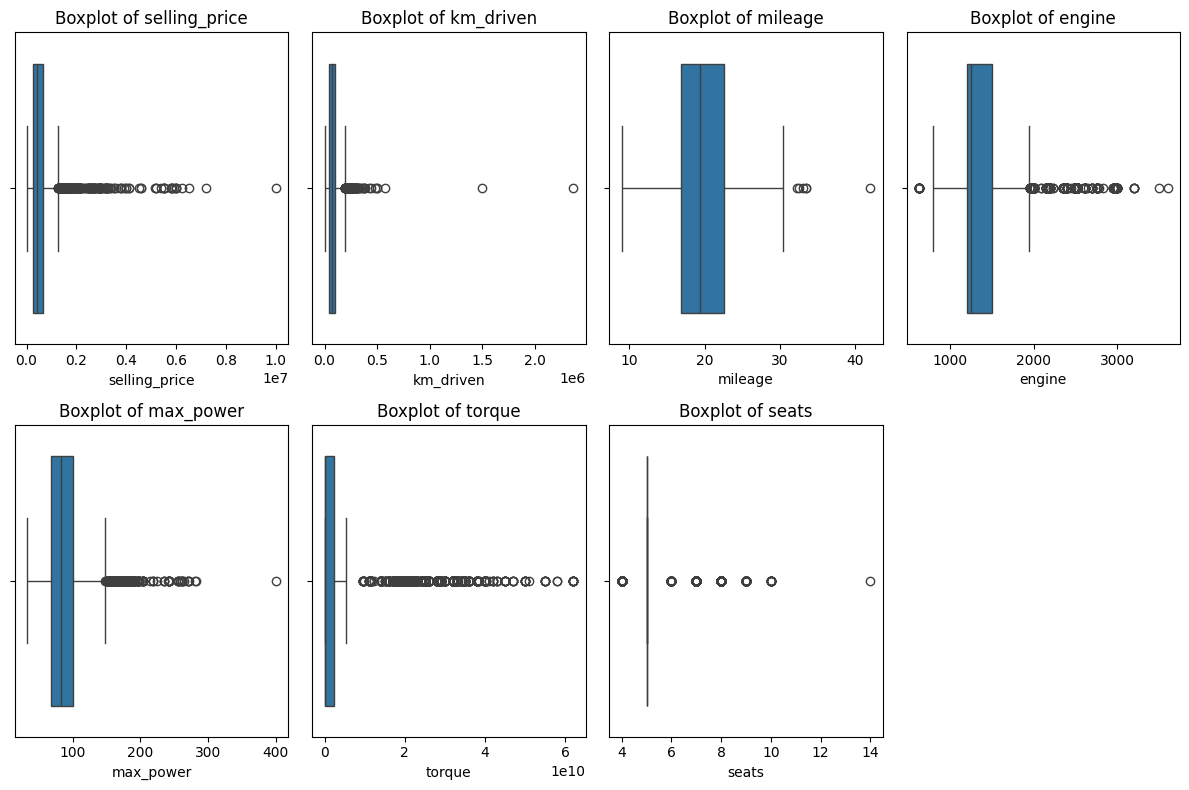

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi boxplot untuk mendeteksi outlier
plt.figure(figsize=(12, 8))

# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 4, i)  # Membuat subplot dalam grid 2x4
    sns.boxplot(data=car, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Menghitung Q1, Q3, dan IQR untuk kolom 'seats'
Q1 = car['seats'].quantile(0.25)
Q3 = car['seats'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring outlier yang berada di atas rentang atas (upper bound)
outlier_seats = car[car['seats'] > upper_bound]

# Ganti outlier dengan median
median_seats = car['seats'].median()
car['seats'] = car['seats'].apply(lambda x: median_seats if x > upper_bound else x)

# Menampilkan hasil outlier yang telah diganti
print("Outlier seats sebelum diganti:")
print(outlier_seats[['seats']])

# Memastikan apakah perubahan berhasil
print("\nJumlah outlier seats setelah diganti:")
print(car[car['seats'] > upper_bound].shape[0])


Outlier seats sebelum diganti:
      seats
16        7
27        7
29        8
39        7
47        7
...     ...
8077      7
8080      7
8083      7
8099      7
8113      8

[1327 rows x 1 columns]

Jumlah outlier seats setelah diganti:
0


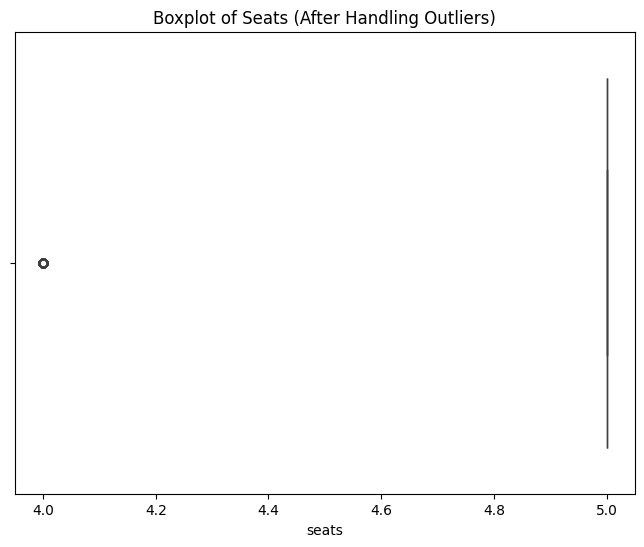

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi boxplot setelah mengganti outlier pada kolom 'seats'
plt.figure(figsize=(8, 6))
sns.boxplot(data=car, x='seats')
plt.title('Boxplot of Seats (After Handling Outliers)')
plt.show()


In [ ]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'selling_price'
Q1_price = car['selling_price'].quantile(0.25)
Q3_price = car['selling_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_price = car[(car['selling_price'] < lower_bound_price) | (car['selling_price'] > upper_bound_price)]

# Ganti outlier dengan median
median_price = car['selling_price'].median()
car['selling_price'] = car['selling_price'].apply(lambda x: median_price if x < lower_bound_price or x > upper_bound_price else x)

# Menampilkan hasil outlier yang telah diganti
print("Outlier selling_price sebelum diganti:")
print(outlier_price[['selling_price']])

# Memastikan apakah perubahan berhasil
print("\nJumlah outlier selling_price setelah diganti:")
print(car[(car['selling_price'] < lower_bound_price) | (car['selling_price'] > upper_bound_price)].shape[0])


Outlier selling_price sebelum diganti:
      selling_price
41          2100000
47          1500000
49          1450000
55          1650000
57          1750000
...             ...
7949        1400000
7963        1265000
7967        1500000
8058        1689999
8108        1575000

[303 rows x 1 columns]

Jumlah outlier selling_price setelah diganti:
0


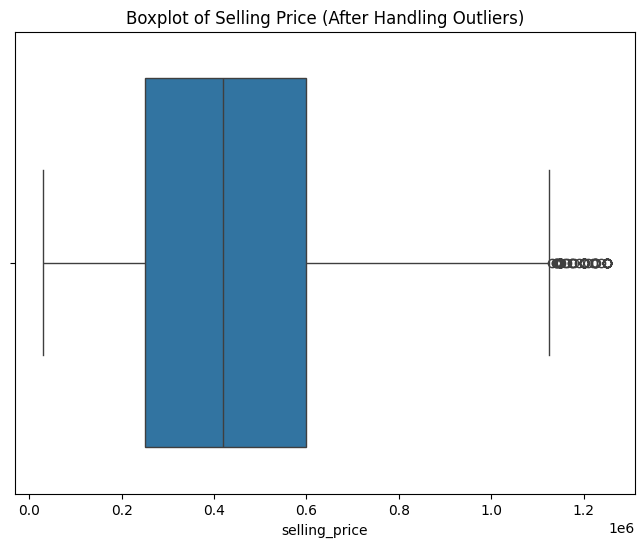

In [ ]:
# Visualisasi boxplot setelah mengganti outlier pada kolom 'selling_price'
plt.figure(figsize=(8, 6))
sns.boxplot(data=car, x='selling_price')
plt.title('Boxplot of Selling Price (After Handling Outliers)')
plt.show()


Outlier km_driven sebelum diganti:
      km_driven
287      207890
394      240000
396      214000
397      214000
401      265000
...         ...
8031     195000
8033     200000
8071     200000
8077     250000
8095     194000

[160 rows x 1 columns]

Jumlah outlier km_driven setelah diganti:
0


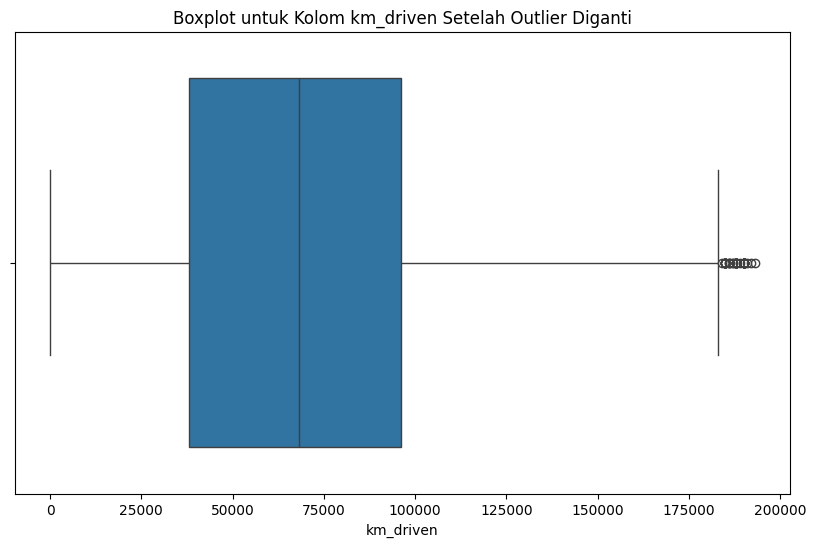

In [ ]:
# Step 1: Menghitung Q1, Q3, dan IQR untuk kolom 'km_driven'
Q1_km = car['km_driven'].quantile(0.25)
Q3_km = car['km_driven'].quantile(0.75)
IQR_km = Q3_km - Q1_km
lower_bound_km = Q1_km - 1.5 * IQR_km
upper_bound_km = Q3_km + 1.5 * IQR_km

# Step 2: Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_km = car[(car['km_driven'] < lower_bound_km) | (car['km_driven'] > upper_bound_km)]

# Ganti outlier dengan median
median_km = car['km_driven'].median()
car['km_driven'] = car['km_driven'].apply(lambda x: median_km if x < lower_bound_km or x > upper_bound_km else x)

# Step 3: Menampilkan hasil outlier yang telah diganti
print("Outlier km_driven sebelum diganti:")
print(outlier_km[['km_driven']])

# Memastikan apakah perubahan berhasil
print("\nJumlah outlier km_driven setelah diganti:")
print(car[(car['km_driven'] < lower_bound_km) | (car['km_driven'] > upper_bound_km)].shape[0])

# Visualisasi Boxplot setelah outlier diganti
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=car['km_driven'])
plt.title('Boxplot untuk Kolom km_driven Setelah Outlier Diganti')
plt.show()


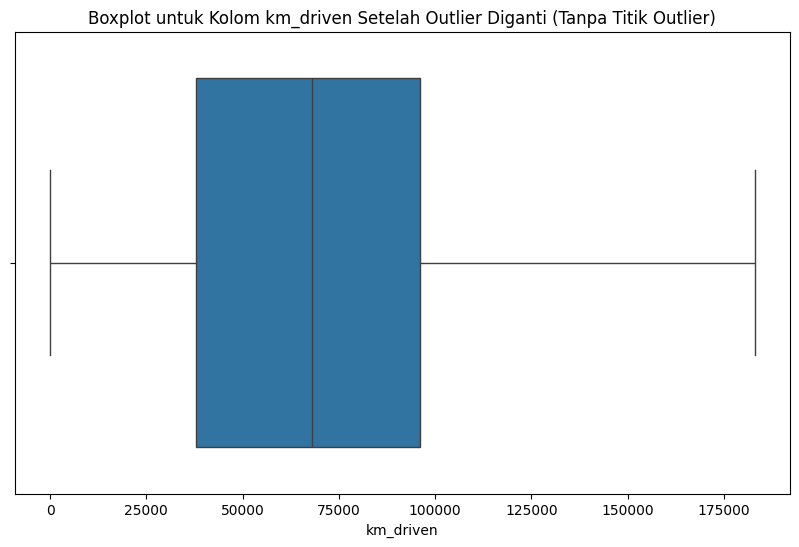

In [ ]:
# Visualisasi Boxplot tanpa titik-titik outlier (fliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=car['km_driven'], showfliers=False)  # showfliers=False untuk menyembunyikan titik outlier
plt.title('Boxplot untuk Kolom km_driven Setelah Outlier Diganti (Tanpa Titik Outlier)')
plt.show()


In [ ]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'mileage'
Q1_mileage = car['mileage'].quantile(0.25)
Q3_mileage = car['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_mileage = car[(car['mileage'] < lower_bound_mileage) | (car['mileage'] > upper_bound_mileage)]

# Menampilkan outlier yang ditemukan
print("Outlier mileage sebelum diganti:")
print(outlier_mileage[['mileage']])

# Ganti outlier dengan median
median_mileage = car['mileage'].median()
car['mileage'] = car['mileage'].apply(lambda x: median_mileage if x < lower_bound_mileage or x > upper_bound_mileage else x)

# Memastikan apakah perubahan berhasil
print("\nJumlah outlier mileage setelah diganti:")
print(car[(car['mileage'] < lower_bound_mileage) | (car['mileage'] > upper_bound_mileage)].shape[0])


Outlier mileage sebelum diganti:
      mileage
35      33.44
170     42.00
2312    32.52
3908    33.44
5789    32.26
5815    33.00

Jumlah outlier mileage setelah diganti:
0


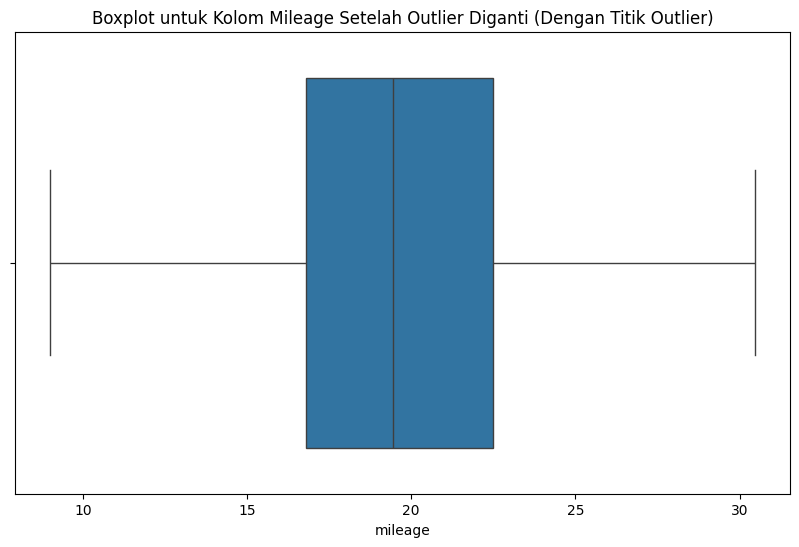

In [ ]:
# Visualisasi Boxplot untuk mileage setelah outlier diganti
plt.figure(figsize=(10, 6))
sns.boxplot(x=car['mileage'], showfliers=True)  # showfliers=True untuk menampilkan titik outlier
plt.title('Boxplot untuk Kolom Mileage Setelah Outlier Diganti (Dengan Titik Outlier)')
plt.show()


In [ ]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'engine'
Q1_engine = car['engine'].quantile(0.25)
Q3_engine = car['engine'].quantile(0.75)
IQR_engine = Q3_engine - Q1_engine
lower_bound_engine = Q1_engine - 1.5 * IQR_engine
upper_bound_engine = Q3_engine + 1.5 * IQR_engine

# Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_engine = car[(car['engine'] < lower_bound_engine) | (car['engine'] > upper_bound_engine)]

# Menampilkan outlier yang ditemukan
print("Outlier engine sebelum diganti:")
print(outlier_engine[['engine']])

# Ganti outlier dengan median
median_engine = car['engine'].median()
car['engine'] = car['engine'].apply(lambda x: median_engine if x < lower_bound_engine or x > upper_bound_engine else x)

# Memastikan apakah perubahan berhasil
print("\nJumlah outlier engine setelah diganti:")
print(car[(car['engine'] < lower_bound_engine) | (car['engine'] > upper_bound_engine)].shape[0])


Outlier engine sebelum diganti:
      engine
39    2179.0
47    2982.0
48    2494.0
49    2143.0
51    2477.0
...      ...
8083  1991.0
8085  1991.0
8089   624.0
8099  2179.0
8113  2494.0

[1195 rows x 1 columns]

Jumlah outlier engine setelah diganti:
0


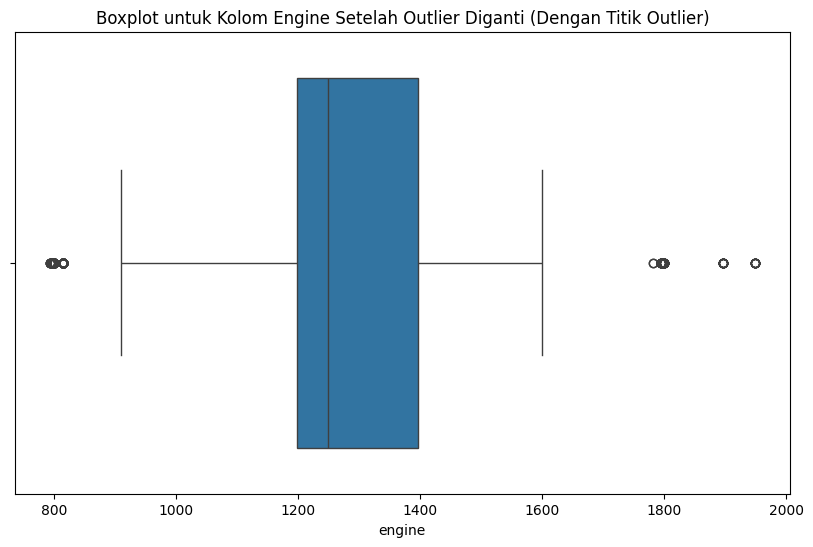

In [ ]:
# Visualisasi Boxplot untuk engine setelah outlier diganti
plt.figure(figsize=(10, 6))
sns.boxplot(x=car['engine'], showfliers=True)  # showfliers=True untuk menampilkan titik outlier
plt.title('Boxplot untuk Kolom Engine Setelah Outlier Diganti (Dengan Titik Outlier)')
plt.show()


Outlier engine sebelum diganti:
      engine
7      796.0
18     796.0
26     796.0
29     796.0
32     796.0
...      ...
8035   796.0
8044   796.0
8058  1798.0
8114   796.0
8115   796.0

[672 rows x 1 columns]

Jumlah outlier engine setelah diganti:
0


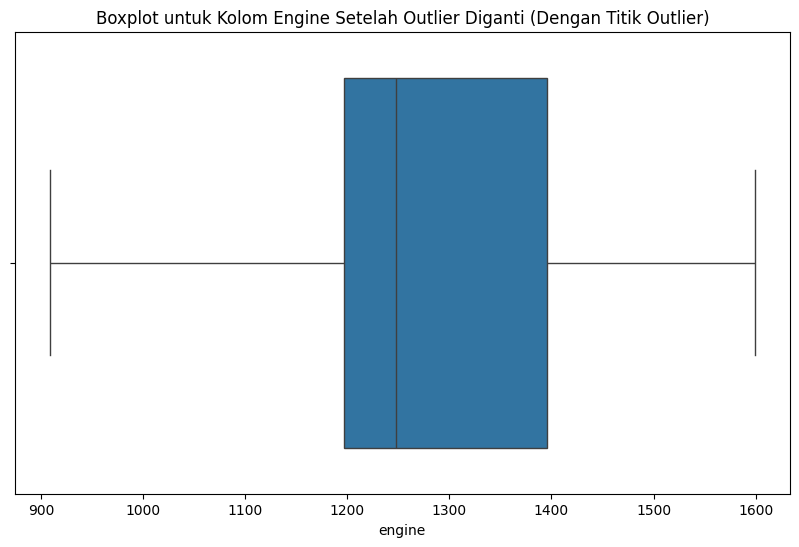

In [ ]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'engine' setelah penggantian outlier
Q1_engine = car['engine'].quantile(0.25)
Q3_engine = car['engine'].quantile(0.75)
IQR_engine = Q3_engine - Q1_engine
lower_bound_engine = Q1_engine - 1.5 * IQR_engine
upper_bound_engine = Q3_engine + 1.5 * IQR_engine

# Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_engine = car[(car['engine'] < lower_bound_engine) | (car['engine'] > upper_bound_engine)]

# Menampilkan outlier yang ditemukan
print("Outlier engine sebelum diganti:")
print(outlier_engine[['engine']])

# Ganti outlier yang masih berada di luar rentang dengan median
median_engine = car['engine'].median()
car['engine'] = car['engine'].apply(lambda x: median_engine if x < lower_bound_engine or x > upper_bound_engine else x)

# Memastikan apakah perubahan berhasil
print("\nJumlah outlier engine setelah diganti:")
print(car[(car['engine'] < lower_bound_engine) | (car['engine'] > upper_bound_engine)].shape[0])

# Visualisasi Boxplot untuk engine setelah outlier diganti
plt.figure(figsize=(10, 6))
sns.boxplot(x=car['engine'], showfliers=True)  # showfliers=True untuk menampilkan titik outlier
plt.title('Boxplot untuk Kolom Engine Setelah Outlier Diganti (Dengan Titik Outlier)')
plt.show()


Outlier max_power sebelum diganti:
      max_power
41       160.77
47       168.50
51       175.56
55       171.50
57       174.33
...         ...
7967     181.00
8023     194.30
8052     158.80
8057     177.60
8058     177.50

[303 rows x 1 columns]

Jumlah outlier max_power setelah diganti:
0


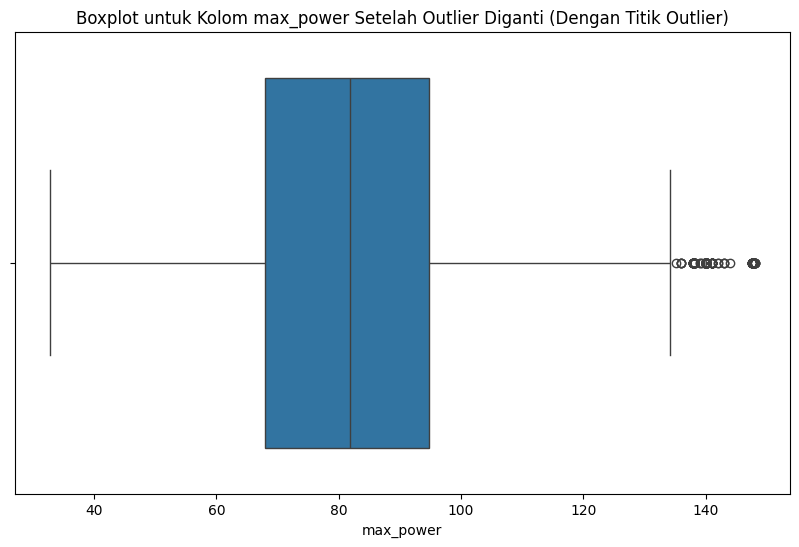

In [ ]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'max_power'
Q1_max_power = car['max_power'].quantile(0.25)
Q3_max_power = car['max_power'].quantile(0.75)
IQR_max_power = Q3_max_power - Q1_max_power
lower_bound_max_power = Q1_max_power - 1.5 * IQR_max_power
upper_bound_max_power = Q3_max_power + 1.5 * IQR_max_power

# Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_max_power = car[(car['max_power'] < lower_bound_max_power) | (car['max_power'] > upper_bound_max_power)]

# Menampilkan outlier yang ditemukan
print("Outlier max_power sebelum diganti:")
print(outlier_max_power[['max_power']])

# Ganti outlier yang masih berada di luar rentang dengan median
median_max_power = car['max_power'].median()
car['max_power'] = car['max_power'].apply(lambda x: median_max_power if x < lower_bound_max_power or x > upper_bound_max_power else x)

# Memastikan apakah perubahan berhasil
print("\nJumlah outlier max_power setelah diganti:")
print(car[(car['max_power'] < lower_bound_max_power) | (car['max_power'] > upper_bound_max_power)].shape[0])

# Visualisasi Boxplot untuk max_power setelah outlier diganti
plt.figure(figsize=(10, 6))
sns.boxplot(x=car['max_power'], showfliers=True)  # showfliers=True untuk menampilkan titik outlier
plt.title('Boxplot untuk Kolom max_power Setelah Outlier Diganti (Dengan Titik Outlier)')
plt.show()


Outlier max_power sebelum diganti:
      max_power
39       138.03
58       138.03
114      138.10
142      141.00
144      138.03
...         ...
8018     138.10
8080     138.10
8083     147.90
8085     147.90
8099     140.00

[301 rows x 1 columns]

Jumlah outlier max_power setelah diganti dan dibatasi:
0


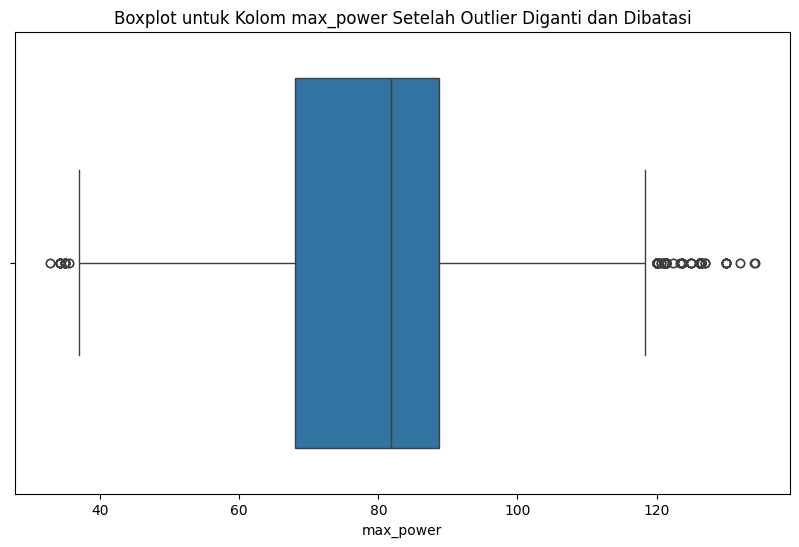

In [ ]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'max_power'
Q1_max_power = car['max_power'].quantile(0.25)
Q3_max_power = car['max_power'].quantile(0.75)
IQR_max_power = Q3_max_power - Q1_max_power
lower_bound_max_power = Q1_max_power - 1.5 * IQR_max_power
upper_bound_max_power = Q3_max_power + 1.5 * IQR_max_power

# Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_max_power = car[(car['max_power'] < lower_bound_max_power) | (car['max_power'] > upper_bound_max_power)]

# Menampilkan outlier yang ditemukan
print("Outlier max_power sebelum diganti:")
print(outlier_max_power[['max_power']])

# Ganti outlier yang masih berada di luar rentang dengan median
median_max_power = car['max_power'].median()
car['max_power'] = car['max_power'].apply(lambda x: median_max_power if x < lower_bound_max_power or x > upper_bound_max_power else x)

# Pastikan semua nilai dalam rentang yang valid
car['max_power'] = car['max_power'].clip(lower=lower_bound_max_power, upper=upper_bound_max_power)

# Memastikan apakah perubahan berhasil
outlier_max_power_after = car[(car['max_power'] < lower_bound_max_power) | (car['max_power'] > upper_bound_max_power)]
print("\nJumlah outlier max_power setelah diganti dan dibatasi:")
print(outlier_max_power_after.shape[0])

# Visualisasi Boxplot untuk max_power setelah outlier diganti
plt.figure(figsize=(10, 6))
sns.boxplot(x=car['max_power'], showfliers=True)  # showfliers=True untuk menampilkan titik outlier
plt.title('Boxplot untuk Kolom max_power Setelah Outlier Diganti dan Dibatasi')
plt.show()


Outlier torque sebelum diganti:
            torque
1     2.501500e+10
8     1.701800e+10
15    1.153500e+10
39    3.201700e+10
41    2.501750e+10
...            ...
8100  2.601500e+10
8108  2.501500e+10
8109  2.151750e+10
8111  1.701800e+10
8112  2.151750e+10

[1648 rows x 1 columns]

Jumlah outlier torque setelah diganti dan dibatasi:
0


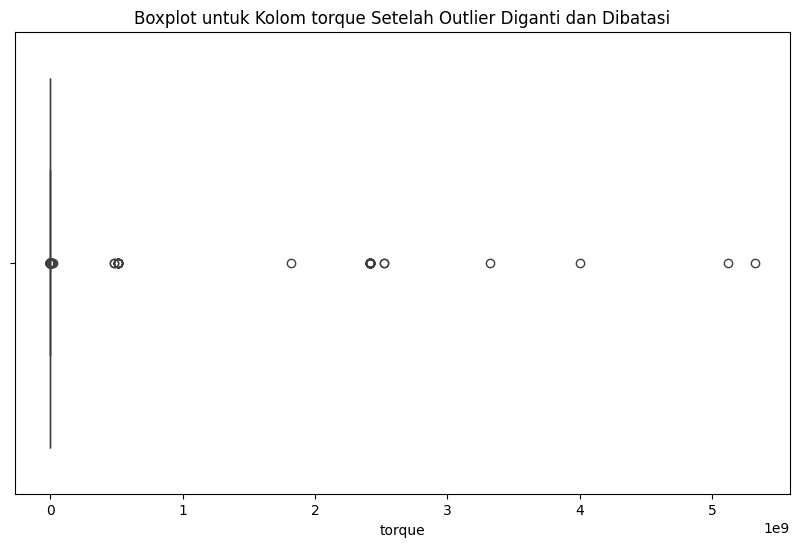

In [ ]:
# Menghitung Q1, Q3, dan IQR untuk kolom 'torque'
Q1_torque = car['torque'].quantile(0.25)
Q3_torque = car['torque'].quantile(0.75)
IQR_torque = Q3_torque - Q1_torque
lower_bound_torque = Q1_torque - 1.5 * IQR_torque
upper_bound_torque = Q3_torque + 1.5 * IQR_torque

# Menyaring outlier yang berada di luar rentang IQR (baik bawah maupun atas)
outlier_torque = car[(car['torque'] < lower_bound_torque) | (car['torque'] > upper_bound_torque)]

# Menampilkan outlier yang ditemukan
print("Outlier torque sebelum diganti:")
print(outlier_torque[['torque']])

# Ganti outlier yang masih berada di luar rentang dengan median
median_torque = car['torque'].median()
car['torque'] = car['torque'].apply(lambda x: median_torque if x < lower_bound_torque or x > upper_bound_torque else x)

# Pastikan semua nilai dalam rentang yang valid
car['torque'] = car['torque'].clip(lower=lower_bound_torque, upper=upper_bound_torque)

# Memastikan apakah perubahan berhasil
outlier_torque_after = car[(car['torque'] < lower_bound_torque) | (car['torque'] > upper_bound_torque)]
print("\nJumlah outlier torque setelah diganti dan dibatasi:")
print(outlier_torque_after.shape[0])

# Visualisasi Boxplot untuk torque setelah outlier diganti
plt.figure(figsize=(10, 6))
sns.boxplot(x=car['torque'], showfliers=True)  # showfliers=True untuk menampilkan titik outlier
plt.title('Boxplot untuk Kolom torque Setelah Outlier Diganti dan Dibatasi')
plt.show()


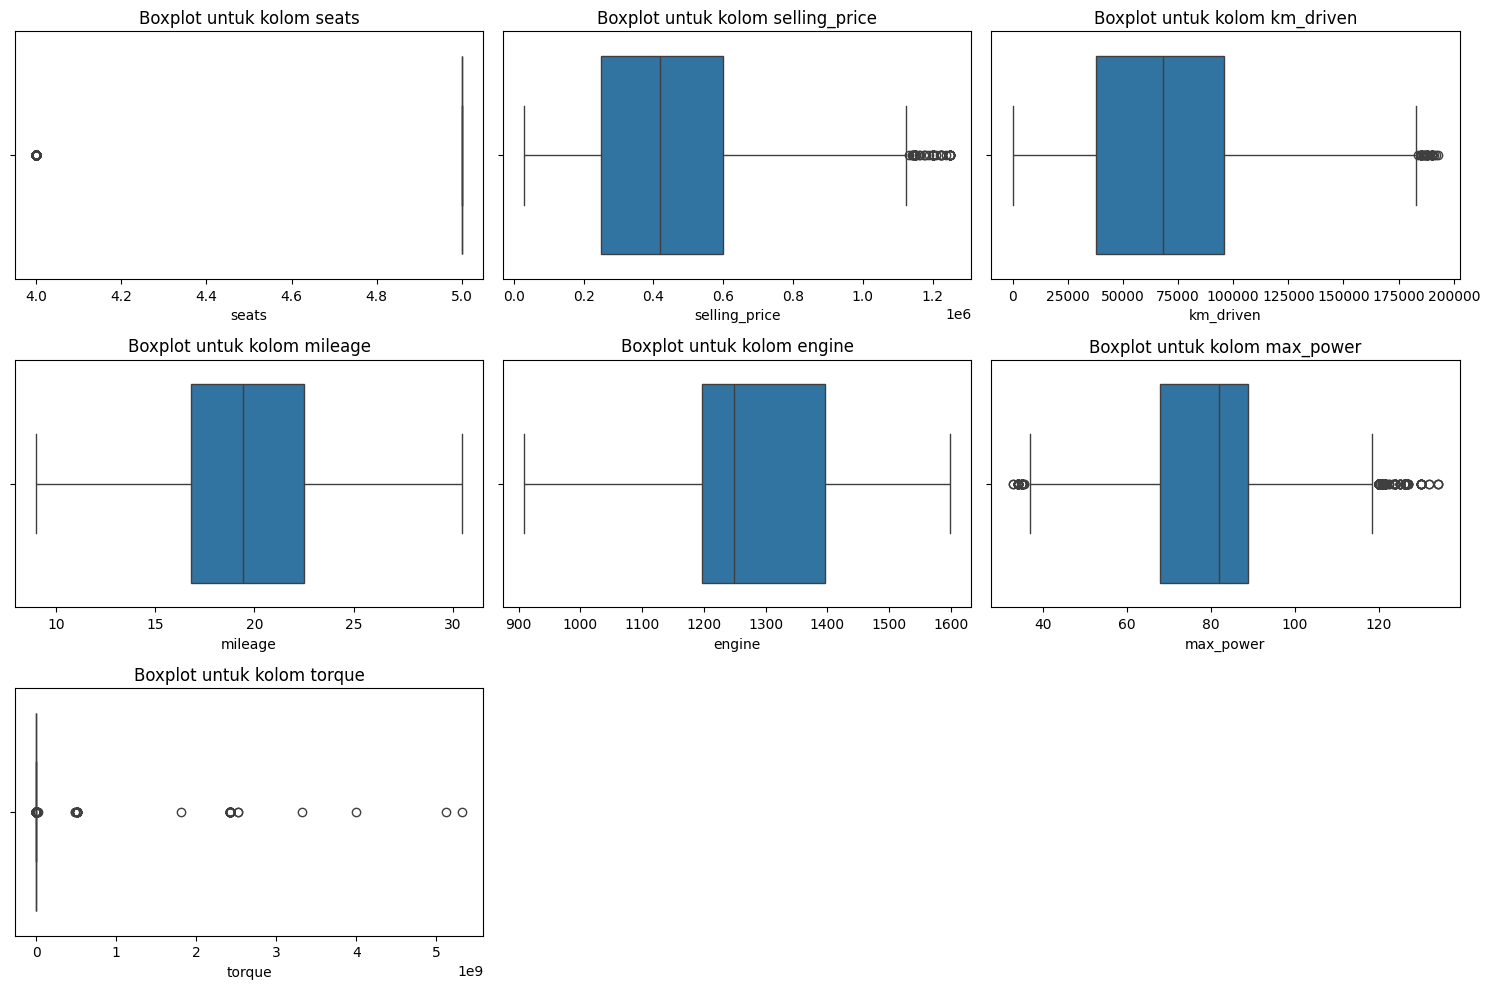

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi boxplot untuk semua kolom yang telah ditangani outlier-nya
columns_to_check = ['seats', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # Membuat grid 3x3 untuk visualisasi boxplot
    sns.boxplot(x=car[column], showfliers=True)  # Menampilkan titik outlier jika ada
    plt.title(f'Boxplot untuk kolom {column}')
    plt.tight_layout()

plt.show()


**4. Exploratory Data Analyst**

1. Visualisasi Scatter Plot dengan Garis Linear

Tujuan:
Untuk memahami hubungan antara setiap fitur numerik dengan selling_price. Scatter plot membantu Anda mengidentifikasi apakah hubungan antara variabel independen (seperti year, km_driven, mileage, dll.) dengan variabel target (selling_price) bersifat linear, non-linear, atau tidak ada hubungan sama sekali.

Proses:

Untuk setiap fitur numerik:


Plotkan scatter plot antara fitur tersebut (sumbu-x) dan selling_price (sumbu-y).
Tambahkan garis linear (trendline) untuk melihat apakah hubungan tersebut dapat direpresentasikan secara linear.

Interpretasi:

Hubungan positif: Ketika fitur meningkat, selling_price juga cenderung meningkat (contoh: max_power).

Hubungan negatif: Ketika fitur meningkat, selling_price cenderung menurun (contoh: year, karena kendaraan yang lebih tua biasanya memiliki harga jual lebih rendah).

Tidak ada hubungan: Data tersebar secara acak tanpa pola yang jelas.

2. Mengecek Distribusi Data dengan Histogram

Tujuan:

Memahami distribusi setiap fitur numerik untuk mengetahui apakah data berdistribusi normal, miring ke kanan (positively skewed), atau miring ke kiri (negatively skewed). Distribusi yang miring dapat memengaruhi performa model, terutama pada algoritma yang sensitif terhadap skala dan distribusi data, seperti Linear Regression.

Proses:

Gunakan Histogram untuk memvisualisasikan distribusi fitur numerik seperti selling_price, km_driven, mileage, dll.

Analisis distribusi data:
Distribusi normal: Data berbentuk simetris seperti lonceng (bell curve).

Positively skewed: Sebagian besar data berada di sisi kiri (nilai lebih kecil).

Negatively skewed: Sebagian besar data berada di sisi kanan (nilai lebih besar).


3. Transformasi Data

Tujuan:

Untuk menangani distribusi data yang tidak normal (skewed). Distribusi yang miring dapat diperbaiki melalui transformasi, sehingga model dapat lebih mudah memahami pola dalam data.

a. Log Transformation
Tujuan: Mengurangi skewness (kemiringan) dalam data, terutama untuk fitur dengan distribusi positif yang ekstrem.

Proses: Terapkan transformasi logaritma pada fitur yang tidak berdistribusi normal. Misalnya:


X′ = log(X+1)

(Ditambahkan 1 untuk menghindari masalah dengan nilai nol).

Contoh Penerapan: Fitur seperti km_driven atau selling_price sering kali memiliki distribusi yang positif (positively skewed) dan dapat ditransformasikan menggunakan log.

b. Box-Cox Transformation
Tujuan:
Alternatif transformasi data untuk membuat distribusi lebih mendekati normal. Cocok untuk data dengan nilai positif dan skewness tinggi.
Proses:
Gunakan fungsi transformasi Box-Cox yang secara otomatis memilih parameter lambda terbaik untuk memperbaiki distribusi data:
𝑦
(
𝜆
)
=
{
𝑦
𝜆
−
1
𝜆
,
jika
𝜆
≠
0
log
⁡
(
𝑦
)
,
jika
𝜆
=
0

y(λ)={yλ-1/λ,
log(y), jika λ = 0
jika λ = 0

Contoh Penerapan: Cocok untuk fitur seperti mileage atau engine, yang memiliki skewness tinggi.

Manfaat Langkah Ini:

Scatter Plot: Memberikan wawasan tentang kekuatan hubungan antara fitur independen dan variabel target, membantu menentukan relevansi fitur.

Histogram: Mengidentifikasi kebutuhan untuk transformasi data dan menunjukkan fitur mana yang mungkin memengaruhi model jika distribusinya tidak diperbaiki.

Transformasi Data: Membantu meningkatkan performa model dengan membuat data lebih seragam dan normal, yang sangat penting untuk algoritma seperti Linear Regression yang mengasumsikan hubungan linear dan data normal.

Scatter Plot: Memberikan wawasan tentang kekuatan hubungan antara fitur independen dan variabel target, membantu menentukan relevansi fitur.

Histogram: Mengidentifikasi kebutuhan untuk transformasi data dan menunjukkan fitur mana yang mungkin memengaruhi model jika distribusinya tidak diperbaiki.

Transformasi Data: Membantu meningkatkan performa model dengan membuat data lebih seragam dan normal, yang sangat penting untuk algoritma seperti Linear Regression yang mengasumsikan hubungan linear dan data normal.

Tahap ini memastikan bahwa data dalam bentuk terbaik untuk dimasukkan ke dalam model prediksi.

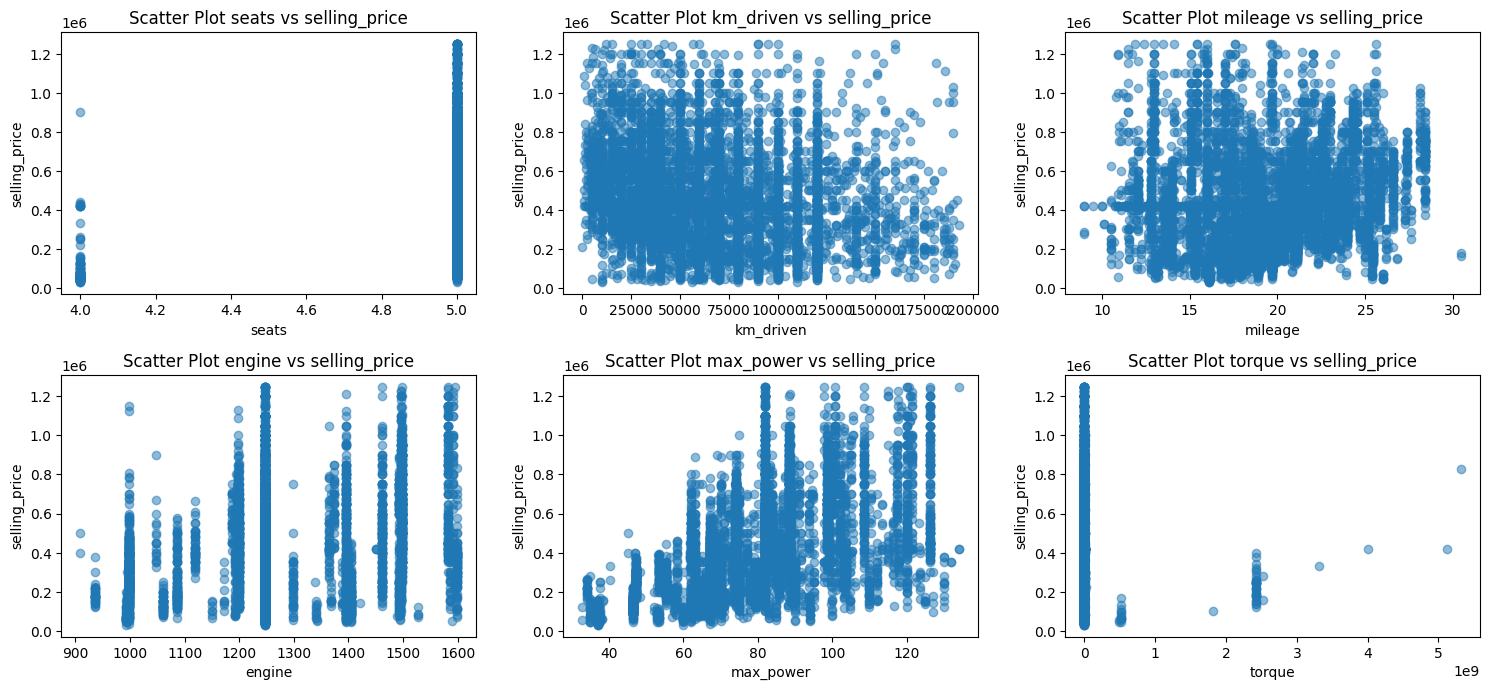

In [ ]:
# Visualisasi scatter plot untuk setiap kolom terhadap selling_price
columns_to_check = ['seats', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

plt.figure(figsize=(15, 10))

# Loop untuk membuat scatter plot untuk setiap kolom
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # Membuat grid 3x3 untuk visualisasi scatter plot
    plt.scatter(car[column], car['selling_price'], alpha=0.5)
    plt.title(f'Scatter Plot {column} vs selling_price')
    plt.xlabel(column)
    plt.ylabel('selling_price')
    plt.tight_layout()

plt.show()


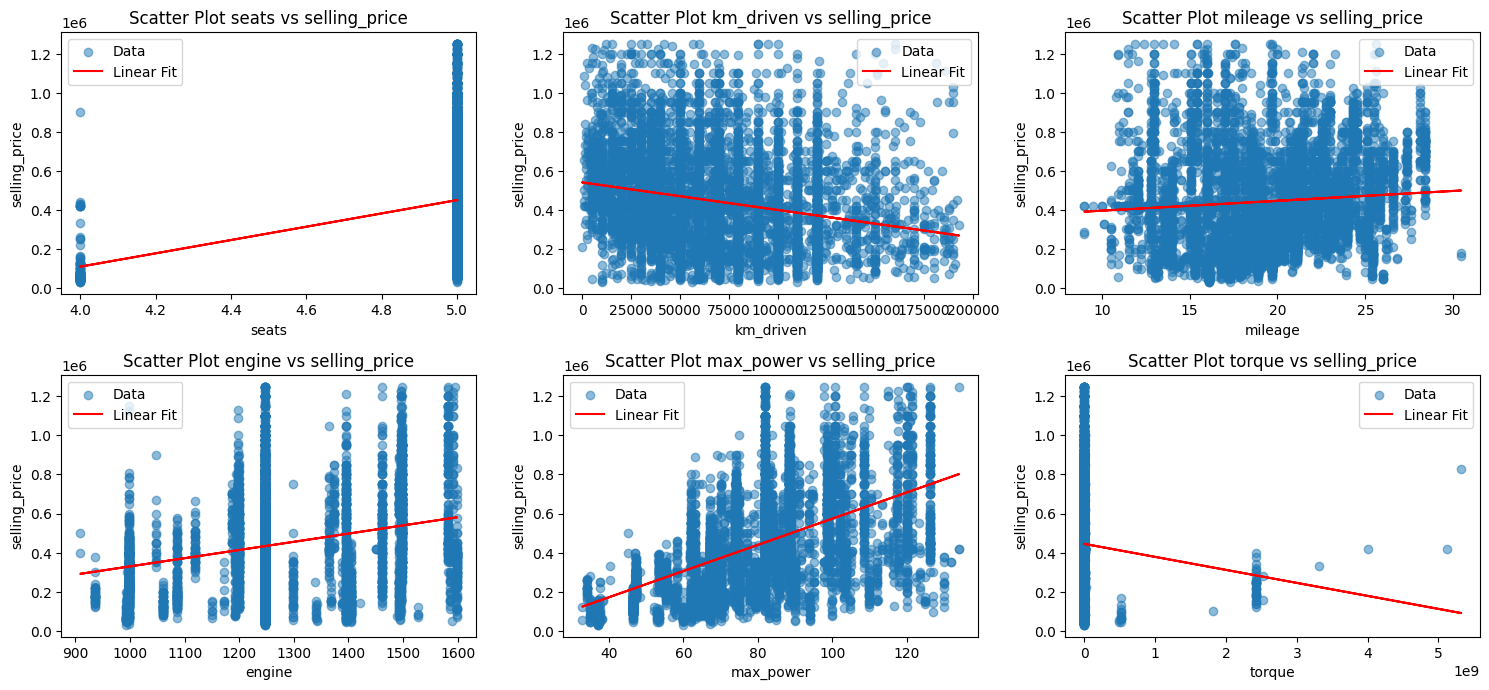

In [ ]:
import scipy.stats as stats

# Visualisasi scatter plot dengan garis linear untuk setiap kolom terhadap selling_price
columns_to_check = ['seats', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

plt.figure(figsize=(15, 10))

# Loop untuk membuat scatter plot dan menambahkan garis linear untuk setiap kolom
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # Membuat grid 3x3 untuk visualisasi scatter plot
    plt.scatter(car[column], car['selling_price'], alpha=0.5, label='Data')

    # Menghitung regresi linear
    slope, intercept, r_value, p_value, std_err = stats.linregress(car[column], car['selling_price'])

    # Menambahkan garis regresi linear
    plt.plot(car[column], slope * car[column] + intercept, color='red', label='Linear Fit')

    # Menambahkan informasi pada plot
    plt.title(f'Scatter Plot {column} vs selling_price')
    plt.xlabel(column)
    plt.ylabel('selling_price')
    plt.legend()
    plt.tight_layout()

plt.show()


In [ ]:
car

,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,torque,seats
0,2014,450000.0,145500.0,Diesel,Individual,Manual,23.40,1248.0,74.00,1.902000e+06,5.0
1,2014,370000.0,120000.0,Diesel,Individual,Manual,21.14,1498.0,103.52,1.344000e+06,5.0
2,2006,158000.0,140000.0,Petrol,Individual,Manual,17.70,1497.0,78.00,1.272700e+01,5.0
3,2010,225000.0,127000.0,Diesel,Individual,Manual,23.00,1396.0,90.00,2.241750e+01,5.0
4,2007,130000.0,120000.0,Petrol,Individual,Manual,16.10,1298.0,88.20,1.154500e+01,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000.0,50000.0,Petrol,Individual,Manual,18.90,998.0,67.10,9.035000e+05,5.0
8122,2014,475000.0,80000.0,Diesel,Individual,Manual,22.54,1396.0,88.73,2.197150e+02,5.0
8123,2013,320000.0,110000.0,Petrol,Individual,Manual,18.50,1197.0,82.85,1.137400e+02,5.0
8124,2007,135000.0,119000.0,Diesel,Individual,Manual,16.80,1493.0,110.00,2.419003e+09,5.0


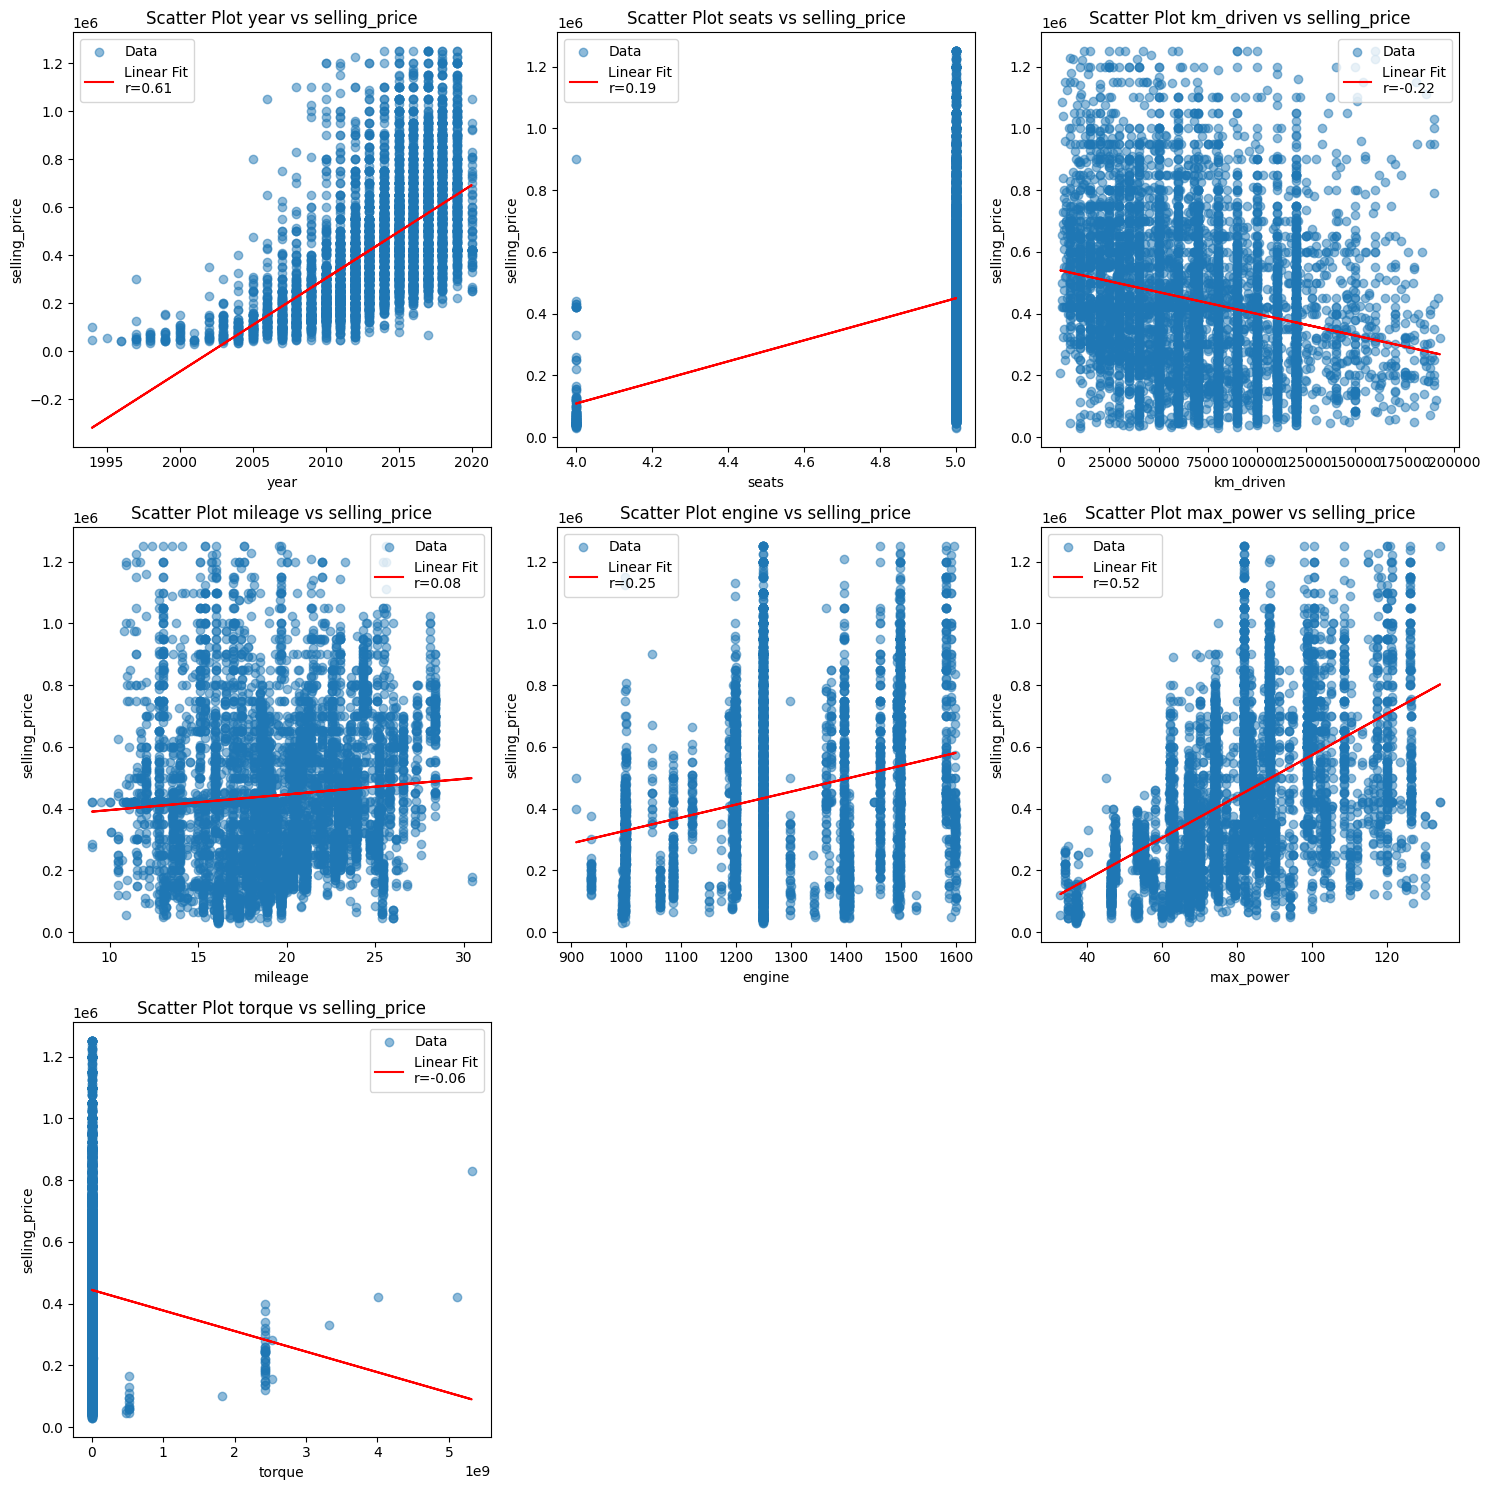

In [ ]:
import scipy.stats as stats

# Tambahkan 'year' ke dalam daftar kolom yang akan diperiksa
columns_to_check = ['year', 'seats', 'km_driven', 'mileage', 'engine', 'max_power', 'torque']

plt.figure(figsize=(15, 15))

# Loop untuk membuat scatter plot dan menambahkan garis linear untuk setiap kolom
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(3, 3, i)  # Membuat grid 3x3 untuk visualisasi scatter plot
    plt.scatter(car[column], car['selling_price'], alpha=0.5, label='Data')

    # Menghitung regresi linear
    slope, intercept, r_value, p_value, std_err = stats.linregress(car[column], car['selling_price'])

    # Menambahkan garis regresi linear
    plt.plot(car[column], slope * car[column] + intercept, color='red', label=f'Linear Fit\nr={r_value:.2f}')

    # Menambahkan informasi pada plot
    plt.title(f'Scatter Plot {column} vs selling_price')
    plt.xlabel(column)
    plt.ylabel('selling_price')
    plt.legend()
    plt.tight_layout()

plt.show()


**Data Transformation**

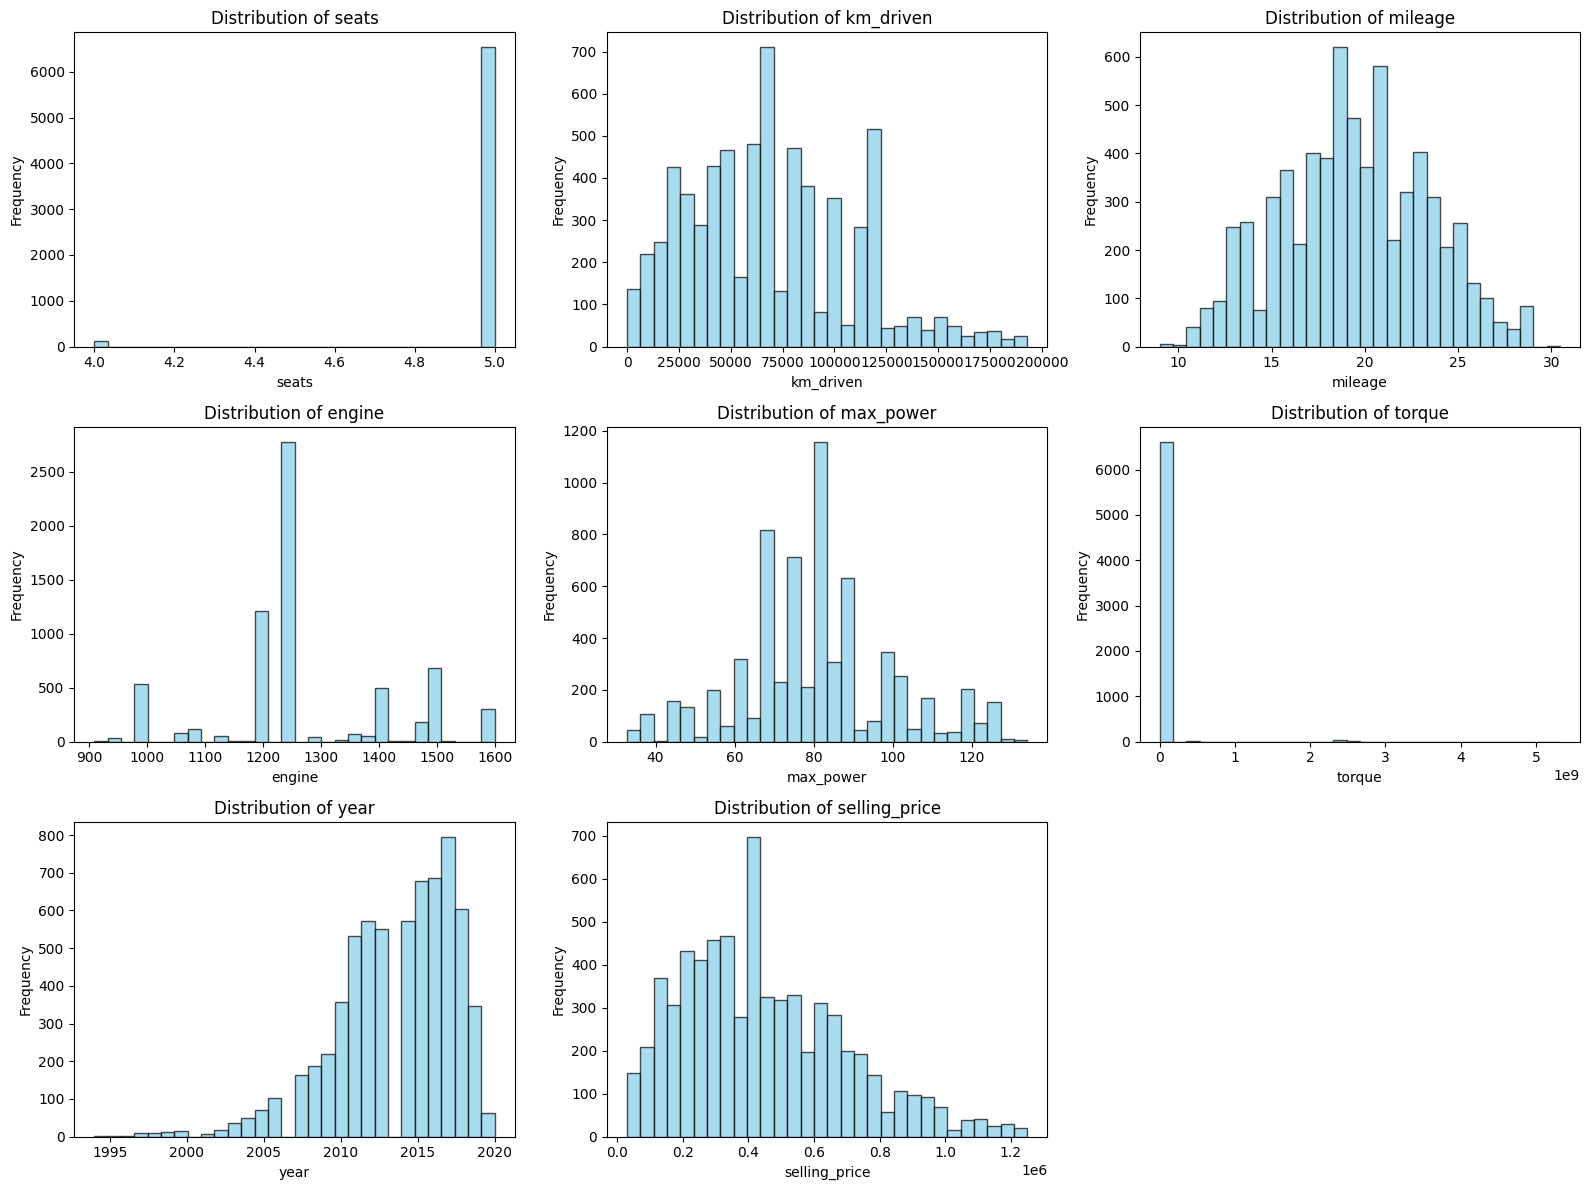

In [ ]:
# Membuat histogram untuk setiap kolom numerik
columns_to_visualize = ['seats', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'year', 'selling_price']

plt.figure(figsize=(16, 12))  # Ukuran figure besar untuk menampung semua plot

# Loop untuk membuat histogram per kolom
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)  # Membuat grid 3x3 untuk histogram
    plt.hist(car[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    # Menambahkan judul dan label
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Agar tidak overlapping
plt.show()


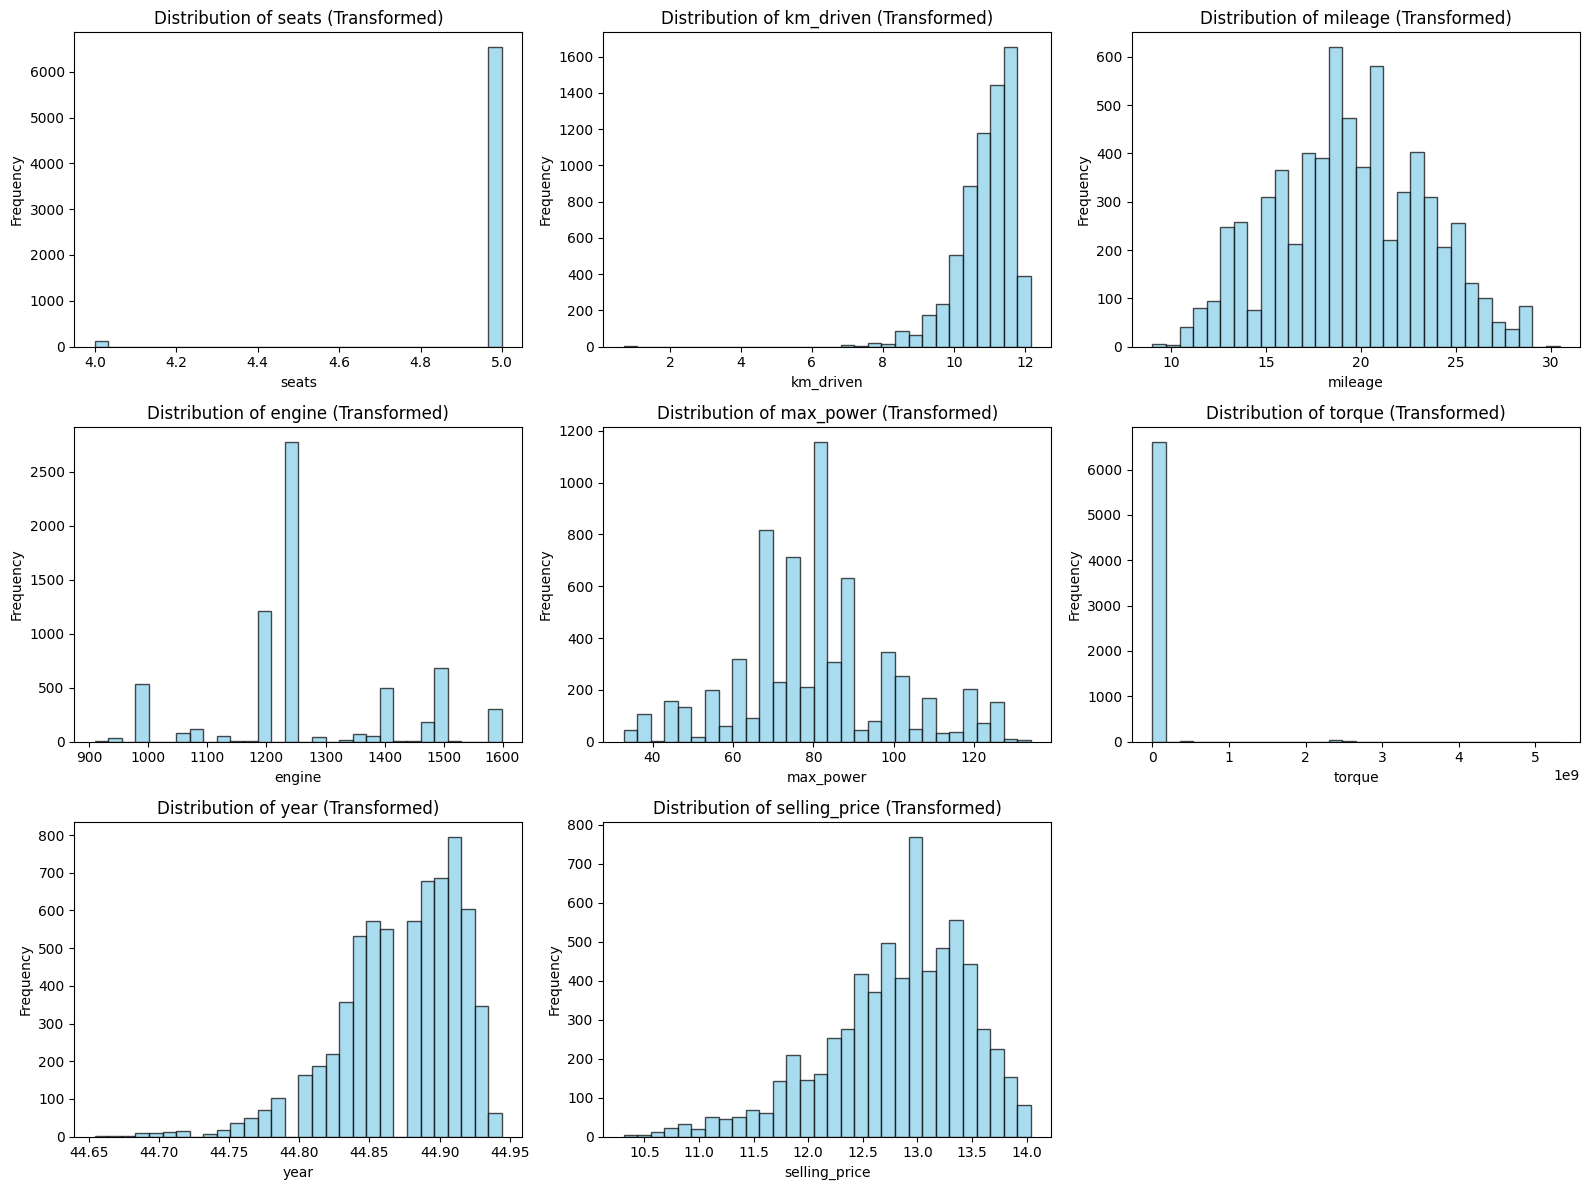

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Log Transformation untuk kolom yang skewed right (selling_price dan km_driven)
car['selling_price'] = np.log1p(car['selling_price'])  # Menggunakan log1p untuk menghindari log(0)
car['km_driven'] = np.log1p(car['km_driven'])

# Square Root Transformation untuk kolom yang skewed left (year)
car['year'] = np.sqrt(car['year'])

# Visualisasi distribusi data setelah transformasi
columns_to_visualize = ['seats', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'year', 'selling_price']

plt.figure(figsize=(16, 12))

# Loop untuk membuat histogram per kolom setelah transformasi
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(3, 3, i)  # Membuat grid 3x3 untuk histogram
    plt.hist(car[column], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

    # Menambahkan judul dan label
    plt.title(f'Distribution of {column} (Transformed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()  # Agar tidak overlapping
plt.show()


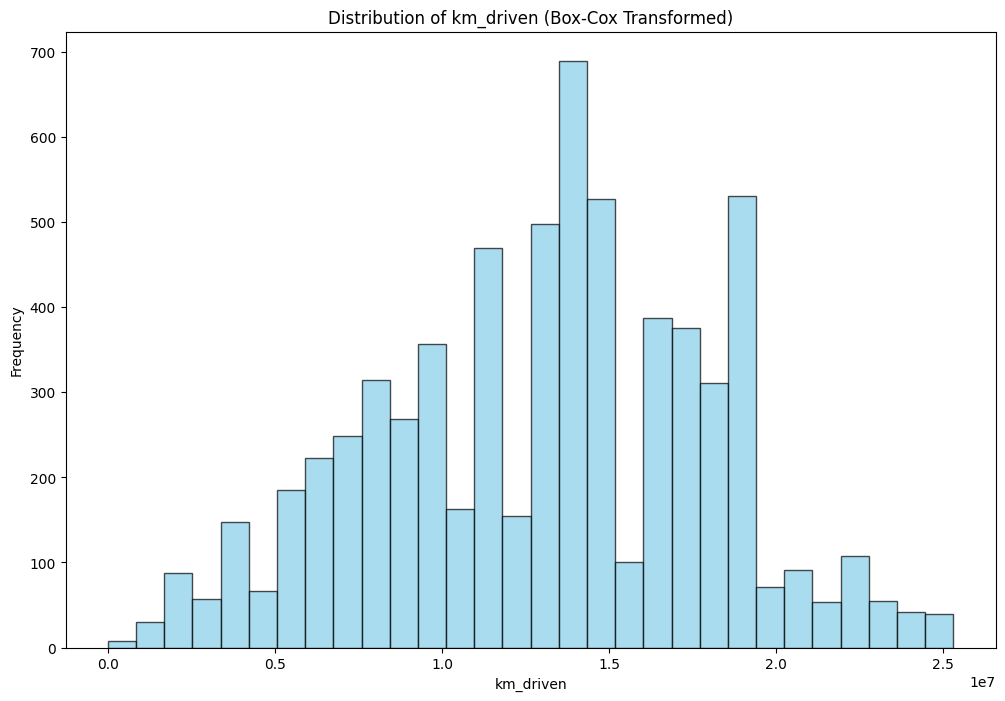

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# Box-Cox Transformation (hanya bisa untuk data positif)
car['km_driven'], _ = stats.boxcox(car['km_driven'] + 1)  # Menambahkan 1 jika ada nilai 0 pada kolom

# Visualisasi distribusi data setelah Box-Cox Transformation
plt.figure(figsize=(12, 8))

# Membuat histogram untuk 'km_driven' setelah Box-Cox Transformation
plt.hist(car['km_driven'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of km_driven (Box-Cox Transformed)')
plt.xlabel('km_driven')
plt.ylabel('Frequency')
plt.show()


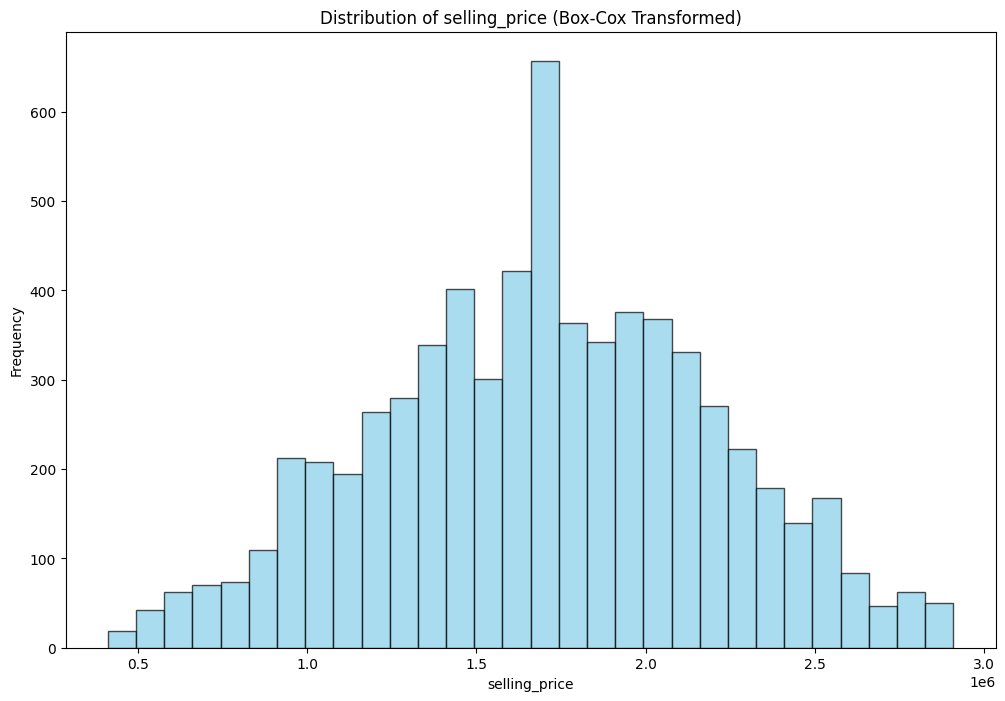

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

# Pastikan semua nilai lebih besar dari 0 (karena Box-Cox hanya bisa digunakan untuk nilai positif)
# Jika ada nilai 0 atau negatif, tambahkan konstanta kecil
car['selling_price'] = car['selling_price'] + 1e-5

# Melakukan Box-Cox transformation pada 'selling_price'
car['selling_price_boxcox'], lambda_value = stats.boxcox(car['selling_price'])

# Visualisasi distribusi data setelah Box-Cox Transformation
plt.figure(figsize=(12, 8))

# Membuat histogram untuk 'selling_price' setelah Box-Cox Transformation
plt.hist(car['selling_price_boxcox'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of selling_price (Box-Cox Transformed)')
plt.xlabel('selling_price')
plt.ylabel('Frequency')
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1120: UserWarning: The optimal lambda is 351.181407362735, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


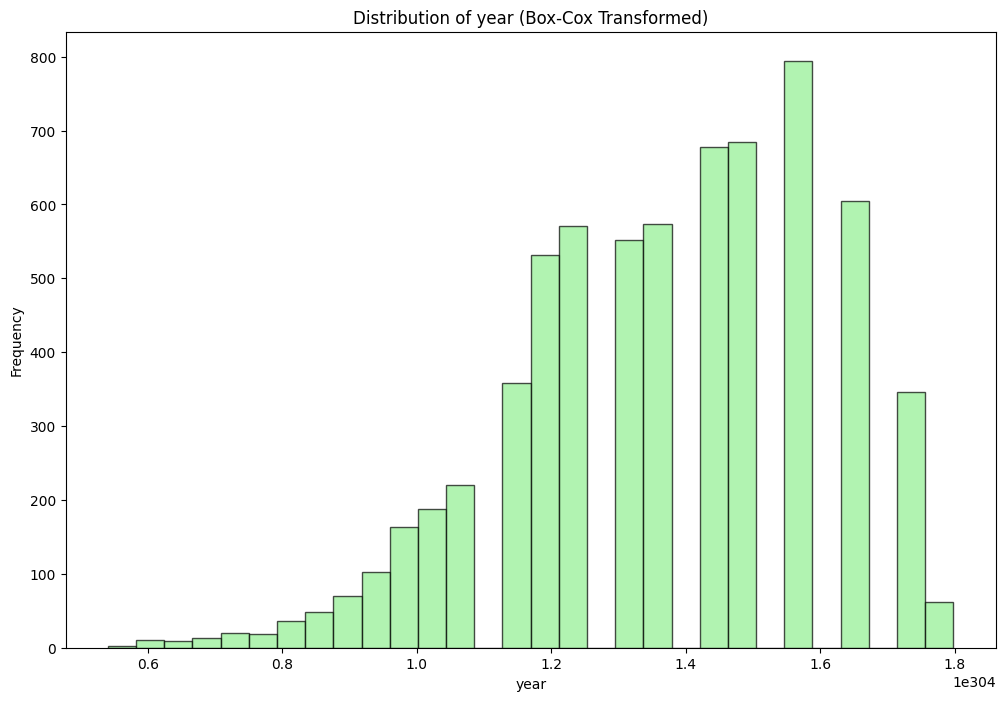

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

# Pastikan semua nilai lebih besar dari 0
# Jika ada nilai nol atau negatif, tambahkan konstanta kecil (ini biasanya tidak terjadi pada tahun)
car['year'] = car['year'] + 1e-5

# Melakukan Box-Cox transformation pada 'year'
car['year_boxcox'], lambda_value_year = stats.boxcox(car['year'])

# Visualisasi distribusi data setelah Box-Cox Transformation
plt.figure(figsize=(12, 8))

# Membuat histogram untuk 'year' setelah Box-Cox Transformation
plt.hist(car['year_boxcox'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Distribution of year (Box-Cox Transformed)')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()


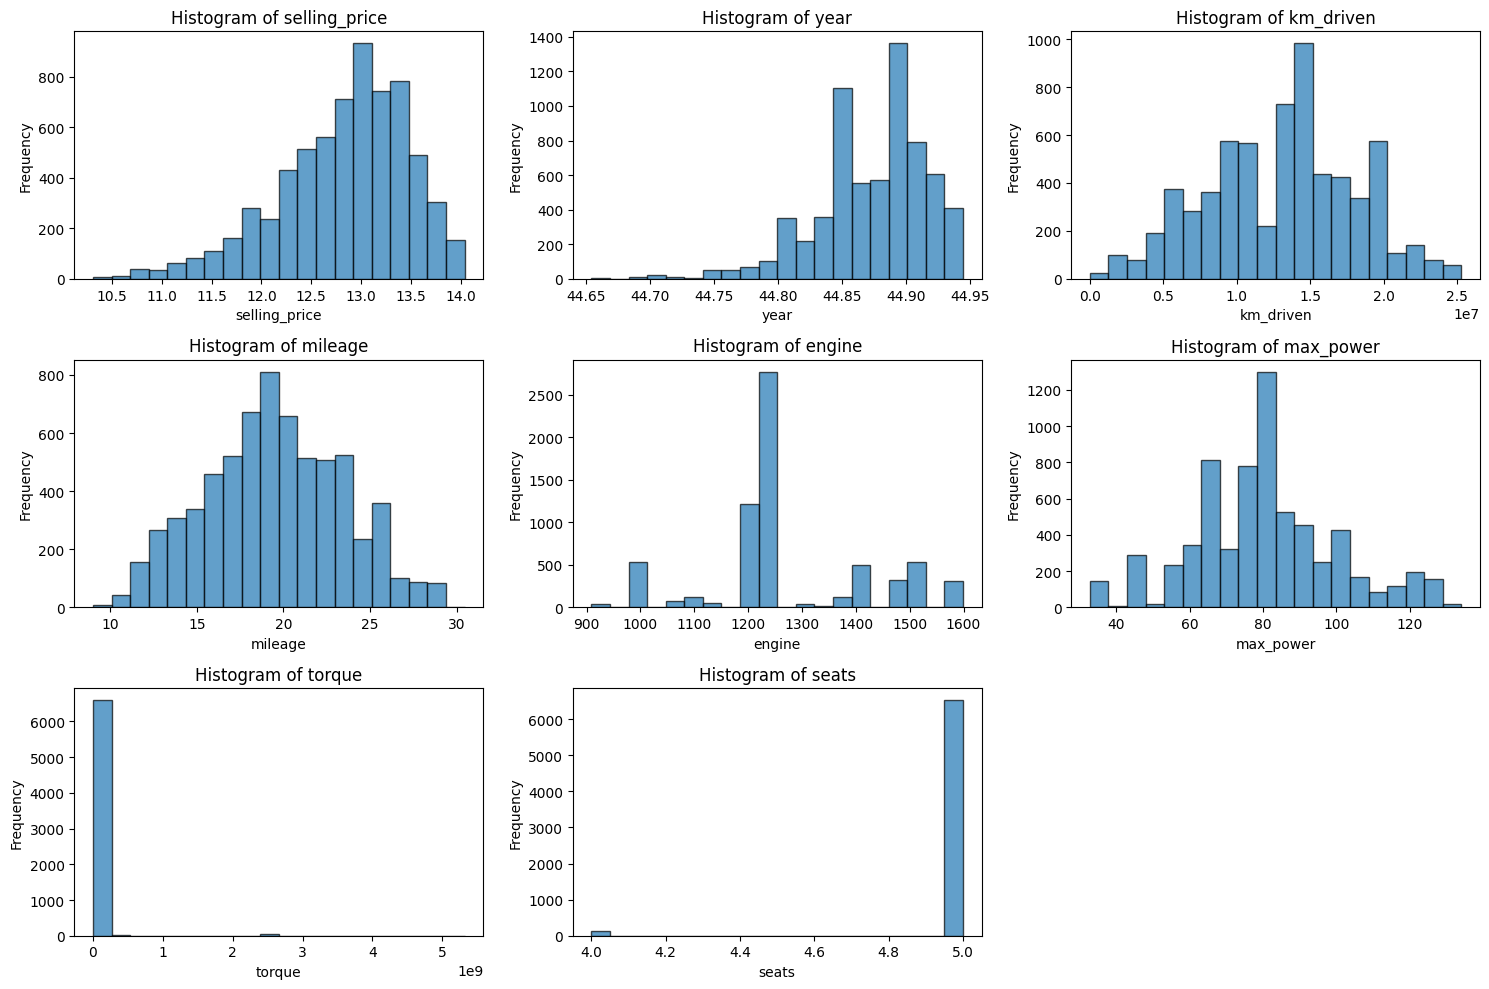

In [ ]:
import matplotlib.pyplot as plt

# List of all columns
columns = ['selling_price', 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Loop through each column and create a histogram
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)  # Create a 3x3 grid of subplots
    plt.hist(car[column], bins=20, edgecolor='black', alpha=0.7)

    # Add title and labels
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout for better readability
plt.tight_layout()
plt.show()


**5.FEATURE/DATA PREPARATION**

1. Encoding Data Categorical

Tujuan:
Mengubah fitur kategorikal menjadi format numerik agar dapat dipahami oleh algoritma machine learning.

Dua pendekatan utama yang digunakan:

a. Label Encoding:

Setiap kategori unik dalam fitur kategorikal diberi nilai numerik. Misalnya:
fuel: Petrol = 0, Diesel = 1, CNG = 2, dll.
Cocok untuk fitur kategorikal yang bersifat ordinal (misalnya, peringkat atau tingkat prioritas).

b. One-Hot Encoding:

Mengubah kategori menjadi kolom biner (dummy variables). Misalnya:
fuel dengan kategori Petrol, Diesel, dan CNG akan menjadi tiga kolom: fuel_Petrol, fuel_Diesel, dan fuel_CNG dengan nilai 0 atau 1.
Cocok untuk fitur kategorikal yang tidak memiliki urutan atau hierarki.

Contoh Implementasi:

Kolom fuel, seller_type, dan transmission diubah menggunakan One-Hot Encoding, karena kategori tersebut tidak memiliki urutan alami.
Jika dataset memiliki terlalu banyak kategori, Anda dapat mempertimbangkan pengelompokan (grouping) kategori yang jarang muncul.

2. Feature Selection (Pemilihan Fitur)

Tujuan:

Memilih fitur yang relevan untuk meningkatkan akurasi model.
Menghindari multikolinieritas dan mengurangi kompleksitas model.

Langkah-Langkah:

a. Mengukur Korelasi dengan Matriks Korelasi
Menghitung korelasi antar fitur numerik dan variabel target (selling_price) menggunakan metode seperti:

Pearson Correlation: Untuk hubungan linear.
Spearman Correlation: Untuk hubungan monoton, baik linear maupun non-linear.
Kendall Correlation: Untuk hubungan ordinal antara variabel.

Proses:

Buat matriks korelasi (correlation matrix) menggunakan fitur numerik.
Pilih fitur dengan korelasi tinggi dengan selling_price.
Hindari fitur yang memiliki korelasi tinggi antar satu sama lain (multikolinieritas), karena dapat menyebabkan redundansi dalam model.

Contoh Hasil:

Fitur year memiliki korelasi negatif kuat dengan selling_price (kendaraan yang lebih tua memiliki harga lebih rendah).

max_power dan engine mungkin memiliki korelasi tinggi dengan target tetapi juga saling berkorelasi, sehingga salah satu dapat dihilangkan.

b. Teknik Statistik untuk Evaluasi Relevansi Fitur
Gunakan teknik statistik untuk mengevaluasi relevansi fitur kategorikal terhadap target:

ANOVA (Analysis of Variance): Untuk fitur kategorikal terhadap target numerik.

Chi-Square Test: Untuk fitur kategorikal terhadap target kategorikal (jika target Anda dikategorikan).

Mutual Information: Untuk mengukur ketergantungan antara fitur dan target, baik untuk data numerik maupun kategorikal.

Proses:

Fitur seperti seller_type atau transmission mungkin menunjukkan hubungan signifikan dengan selling_price melalui ANOVA atau mutual information, sehingga tetap dipertahankan.

Kesimpulan dari Feature Selection
Setelah analisis korelasi dan teknik statistik:

Fitur yang dipertahankan adalah yang memiliki korelasi tinggi dengan selling_price dan memberikan kontribusi informasi unik.

Fitur yang dihilangkan adalah yang tidak relevan atau memiliki multikolinieritas tinggi (misalnya, engine mungkin dihapus jika max_power sudah cukup representatif).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Pilih kolom yang akan distandarisasi
columns_to_standardize = ['seats', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'selling_price']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan standarisasi pada kolom yang dipilih
car[columns_to_standardize] = scaler.fit_transform(car[columns_to_standardize])

# Verifikasi hasil standarisasi
car[columns_to_standardize].describe()


,seats,km_driven,mileage,engine,max_power,torque,selling_price
count,6.657000e+03,6.657000e+03,6.657000e+03,6.657000e+03,6.657000e+03,6.657000e+03,6.657000e+03
mean,1.049217e-15,1.003320e-16,-2.476279e-16,2.177418e-16,3.074002e-16,1.067362e-17,-1.999169e-15
std,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-7.288481e+00,-2.606359e+00,-2.675677e+00,-2.479889e+00,-2.475310e+00,-8.513172e-02,-3.841122e+00
25%,1.372028e-01,-7.044440e-01,-6.872862e-01,-5.108844e-01,-6.510395e-01,-8.215780e-02,-5.970773e-01
50%,1.372028e-01,1.321314e-01,-1.429240e-02,-1.622064e-01,6.726701e-02,-7.871605e-02,1.966834e-01
75%,1.372028e-01,7.582112e-01,7.657685e-01,8.496435e-01,4.248655e-01,-7.867547e-02,7.424009e-01
max,1.372028e-01,2.425578e+00,2.794947e+00,2.237519e+00,2.774650e+00,2.531033e+01,1.865385e+00


**Encoding Data Categorical**

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Label Encoding untuk kolom 'seats' (jika seats dianggap ordinal)
label_encoder = LabelEncoder()
car['seats'] = label_encoder.fit_transform(car['seats'])

# One-Hot Encoding untuk kolom-kolom kategorikal nominal
car = pd.get_dummies(car, columns=['fuel', 'seller_type', 'transmission'], drop_first=True)

# Menampilkan hasil encoding
print(car.head())


        year  selling_price  km_driven   mileage    engine  max_power  \
0  44.877621       0.302243   1.680710  0.995198 -0.162206  -0.340084   
1  44.877621       0.002752   1.229192  0.419075  1.546999   1.189815   
2  44.788401      -1.299146   1.586911 -0.457856  1.540163  -0.132781   
3  44.833034      -0.758280   1.357561  0.893229  0.849643   0.489130   
4  44.799564      -1.597590   1.229192 -0.865731  0.179635   0.395843   

     torque  seats  selling_price_boxcox    year_boxcox  fuel_Diesel  \
0 -0.076052      1          1.802960e+06  1.364302e+304         True   
1 -0.078716      1          1.638010e+06  1.364302e+304         True   
2 -0.085132      1          1.060378e+06  9.432220e+303        False   
3 -0.085132      1          1.274972e+06  1.134598e+304         True   
4 -0.085132      1          9.556036e+05  9.878385e+303        False   

   fuel_LPG  fuel_Petrol  seller_type_Individual  \
0     False        False                    True   
1     False        False

In [ ]:
# Menampilkan beberapa baris pertama untuk memeriksa hasil encoding
car.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,selling_price_boxcox,year_boxcox,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,44.877621,0.302243,1.680710,0.995198,-0.162206,-0.340084,-0.076052,1,1.802960e+06,1.364302e+304,True,False,False,True,False,True
1,44.877621,0.002752,1.229192,0.419075,1.546999,1.189815,-0.078716,1,1.638010e+06,1.364302e+304,True,False,False,True,False,True
2,44.788401,-1.299146,1.586911,-0.457856,1.540163,-0.132781,-0.085132,1,1.060378e+06,9.432220e+303,False,False,True,True,False,True
3,44.833034,-0.758280,1.357561,0.893229,0.849643,0.489130,-0.085132,1,1.274972e+06,1.134598e+304,True,False,False,True,False,True
4,44.799564,-1.597590,1.229192,-0.865731,0.179635,0.395843,-0.085132,1,9.556036e+05,9.878385e+303,False,False,True,True,False,True


**FEATURE SELECTION**

3. Feature Selection (Pemilihan Fitur)

Tujuan: Memilih kolom atau fitur yang relevan dan menghilangkan fitur yang tidak penting.

Langkah-langkah:

- Mengukur Korelasi:
Gunakan matriks korelasi untuk mengecek hubungan antar fitur (Pearson, Spearman, atau Kendall).

- Pilih fitur yang memiliki korelasi tinggi dengan target dan rendah dengan fitur lain (menghindari multikolinieritas).

- Teknik Statistik:
ANOVA, Chi-Square, atau mutual information untuk mengevaluasi relevansi fitur.

- Feature Importance:
Gunakan algoritma seperti Random Forest atau Gradient Boosting untuk mengevaluasi fitur mana yang lebih penting.


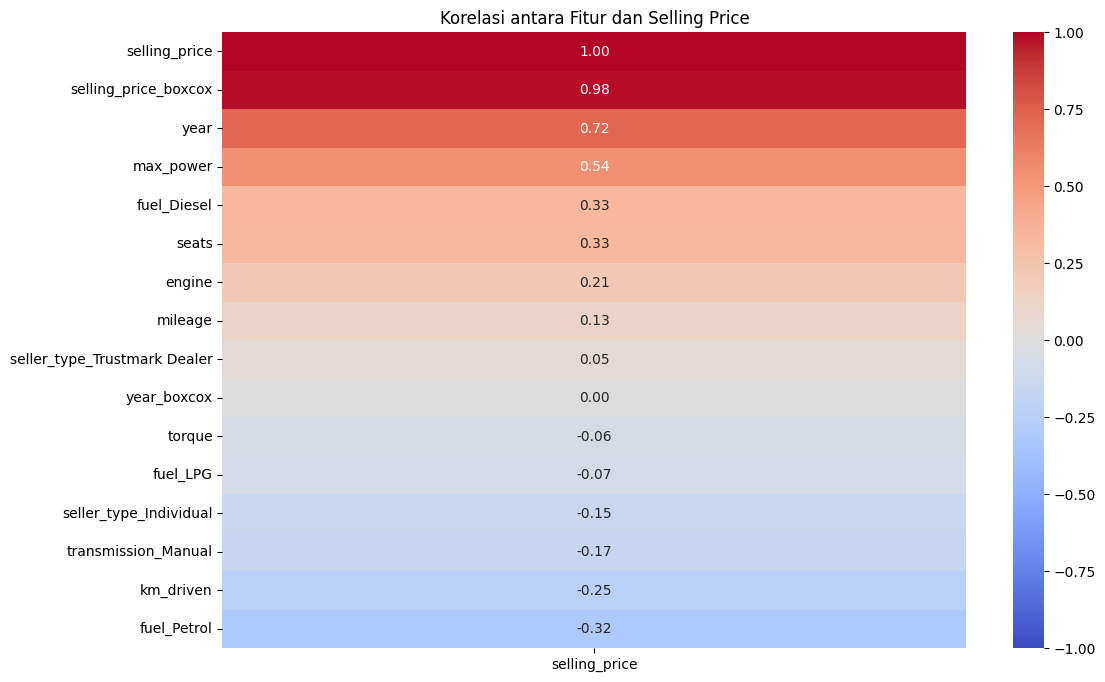

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi dengan Pearson
correlation_matrix = car.corr()

# Menampilkan korelasi antar fitur dengan target ('selling_price')
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['selling_price']].sort_values(by='selling_price', ascending=False),
            annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Korelasi antara Fitur dan Selling Price')
plt.show()


In [ ]:
# Mengidentifikasi kolom yang memiliki korelasi tinggi
corr_matrix = car.corr()
high_corr_var = np.where(corr_matrix > 0.9)  # Korelasi lebih dari 0.9
high_corr_var = [(corr_matrix.columns[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y]
print(high_corr_var)


[('selling_price', 'selling_price_boxcox'), ('selling_price_boxcox', 'selling_price')]


In [ ]:
# Menghapus kolom yang memiliki korelasi tinggi (selling_price_boxcox)
car = car.drop(columns=['selling_price_boxcox'])


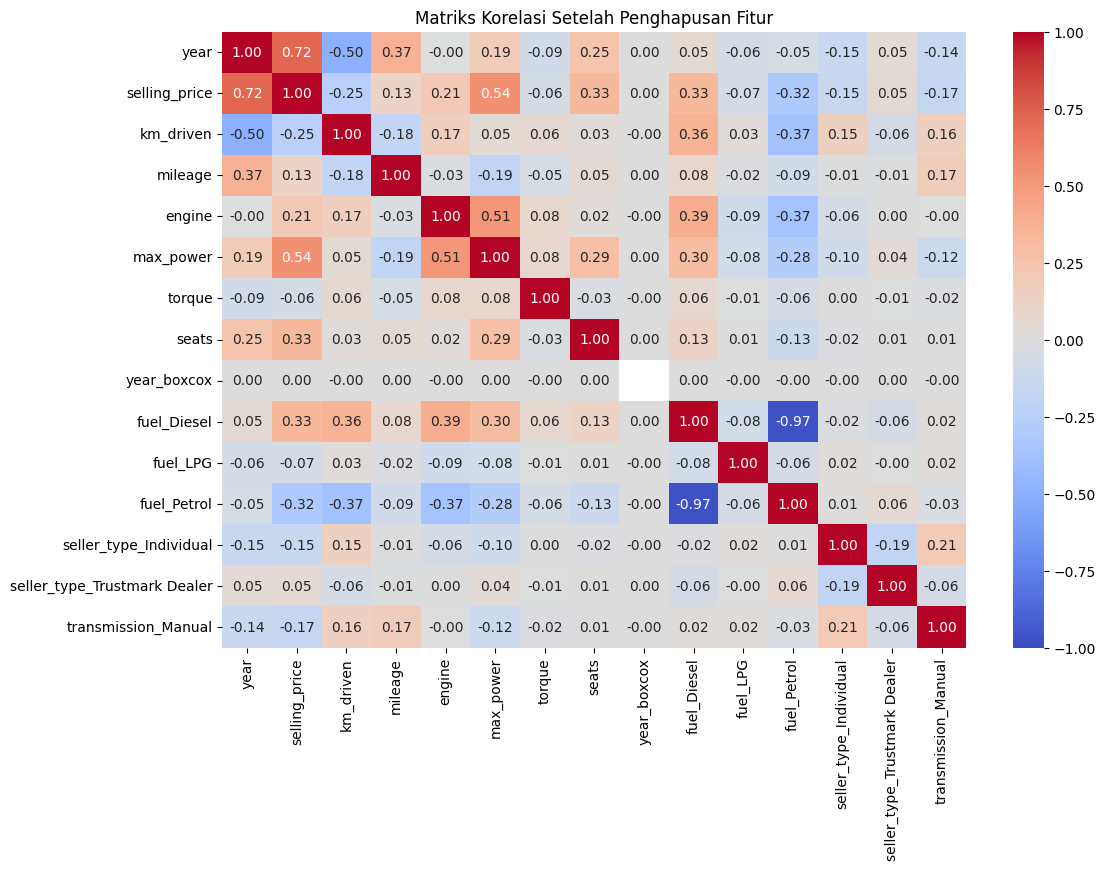

In [ ]:
# Memeriksa korelasi lagi setelah penghapusan
corr_matrix = car.corr()

# Menampilkan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriks Korelasi Setelah Penghapusan Fitur')
plt.show()


In [ ]:
from sklearn.feature_selection import f_classif

# Menggunakan ANOVA untuk mengevaluasi fitur kategorikal terhadap target numerik
X = car[['fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual']]
y = car['selling_price']

f_values, p_values = f_classif(X, y)
anova_results = pd.DataFrame({'Feature': X.columns, 'F-Value': f_values, 'P-Value': p_values})
print(anova_results)


                        Feature   F-Value       P-Value
0                   fuel_Diesel  2.922186  0.000000e+00
1                      fuel_LPG  1.963926  5.209994e-32
2                   fuel_Petrol  2.779539  0.000000e+00
3        seller_type_Individual  2.646509  0.000000e+00
4  seller_type_Trustmark Dealer  0.828682  9.979344e-01
5           transmission_Manual  4.183285  0.000000e+00


Berdasarkan hasil ANOVA ini, Anda bisa mengambil beberapa langkah:

Fitur yang Signifikan:

Fitur seperti fuel_Diesel, fuel_LPG, fuel_Petrol, seller_type_Individual, dan transmission_Manual memiliki p-value yang sangat kecil dan dengan demikian bisa dipertimbangkan untuk dimasukkan dalam model.

Fitur yang Tidak Signifikan:

Fitur seller_type_Trustmark Dealer memiliki p-value yang sangat tinggi (0.9979), menunjukkan bahwa fitur ini tidak relevan untuk model dan bisa dipertimbangkan untuk dihapus.

In [ ]:
# Menghapus fitur 'seller_type_Trustmark Dealer' yang tidak signifikan
car = car.drop(columns=['seller_type_Trustmark Dealer'])

# Menampilkan dataset setelah fitur dihapus
car.head()


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,year_boxcox,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual
0,44.877621,0.302243,1.680710,0.995198,-0.162206,-0.340084,-0.076052,1,1.364302e+304,True,False,False,True,True
1,44.877621,0.002752,1.229192,0.419075,1.546999,1.189815,-0.078716,1,1.364302e+304,True,False,False,True,True
2,44.788401,-1.299146,1.586911,-0.457856,1.540163,-0.132781,-0.085132,1,9.432220e+303,False,False,True,True,True
3,44.833034,-0.758280,1.357561,0.893229,0.849643,0.489130,-0.085132,1,1.134598e+304,True,False,False,True,True
4,44.799564,-1.597590,1.229192,-0.865731,0.179635,0.395843,-0.085132,1,9.878385e+303,False,False,True,True,True


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# Menggunakan Mutual Information untuk memilih fitur
X = car.drop(columns=['selling_price'])
y = car['selling_price']

mutual_info = mutual_info_regression(X, y)
mutual_info_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mutual_info})
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)
print(mutual_info_df)


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1746: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr, where=where)


                   Feature  Mutual Information
4                max_power            0.649292
2                  mileage            0.543230
5                   torque            0.440609
0                     year            0.403171
3                   engine            0.245560
10             fuel_Petrol            0.068810
8              fuel_Diesel            0.065310
1                km_driven            0.062459
12     transmission_Manual            0.059929
11  seller_type_Individual            0.047325
6                    seats            0.045756
9                 fuel_LPG            0.010125
7              year_boxcox            0.000000


In [ ]:
# Menghapus fitur yang memiliki Mutual Information rendah
car = car.drop(columns=['seats', 'year_boxcox'])

# Menampilkan dataset setelah fitur dihapus
car.head()


,year,selling_price,km_driven,mileage,engine,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual
0,44.877621,0.302243,1.680710,0.995198,-0.162206,-0.340084,-0.076052,True,False,False,True,True
1,44.877621,0.002752,1.229192,0.419075,1.546999,1.189815,-0.078716,True,False,False,True,True
2,44.788401,-1.299146,1.586911,-0.457856,1.540163,-0.132781,-0.085132,False,False,True,True,True
3,44.833034,-0.758280,1.357561,0.893229,0.849643,0.489130,-0.085132,True,False,False,True,True
4,44.799564,-1.597590,1.229192,-0.865731,0.179635,0.395843,-0.085132,False,False,True,True,True


In [ ]:
# Menambahkan fitur 'age_of_car'
current_year = 2024  # Misalkan tahun saat ini adalah 2024
car['age_of_car'] = current_year - car['year']

# Menampilkan dataset setelah fitur baru ditambahkan
print(car[['year', 'age_of_car']].head())


        year   age_of_car
0  44.877621  1979.122379
1  44.877621  1979.122379
2  44.788401  1979.211599
3  44.833034  1979.166966
4  44.799564  1979.200436


In [ ]:
car.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,age_of_car
0,44.877621,0.302243,1.680710,0.995198,-0.162206,-0.340084,-0.076052,True,False,False,True,True,1979.122379
1,44.877621,0.002752,1.229192,0.419075,1.546999,1.189815,-0.078716,True,False,False,True,True,1979.122379
2,44.788401,-1.299146,1.586911,-0.457856,1.540163,-0.132781,-0.085132,False,False,True,True,True,1979.211599
3,44.833034,-0.758280,1.357561,0.893229,0.849643,0.489130,-0.085132,True,False,False,True,True,1979.166966
4,44.799564,-1.597590,1.229192,-0.865731,0.179635,0.395843,-0.085132,False,False,True,True,True,1979.200436


In [ ]:
# Menghitung rata-rata selling_price per tahun
average_price_per_year = car.groupby('year')['selling_price'].mean().reset_index()

# Menampilkan hasil agregasi
average_price_per_year


,year,selling_price
0,44.654237,-2.617552
1,44.665433,-2.913696
2,44.676626,-3.363601
3,44.687816,-2.635735
4,44.699003,-2.887993
5,44.710188,-2.682586
6,44.721370,-2.492662
7,44.732548,-3.230342
8,44.743725,-2.174663
9,44.754898,-2.173593


In [ ]:
car.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,age_of_car
0,44.877621,0.302243,1.680710,0.995198,-0.162206,-0.340084,-0.076052,True,False,False,True,True,1979.122379
1,44.877621,0.002752,1.229192,0.419075,1.546999,1.189815,-0.078716,True,False,False,True,True,1979.122379
2,44.788401,-1.299146,1.586911,-0.457856,1.540163,-0.132781,-0.085132,False,False,True,True,True,1979.211599
3,44.833034,-0.758280,1.357561,0.893229,0.849643,0.489130,-0.085132,True,False,False,True,True,1979.166966
4,44.799564,-1.597590,1.229192,-0.865731,0.179635,0.395843,-0.085132,False,False,True,True,True,1979.200436


In [ ]:
# Membuat kategori untuk harga mobil
bins = [0, 500000, 1000000, 1500000, np.inf]
labels = ['Murah', 'Menengah', 'Mahal', 'Sangat Mahal']
car['price_category'] = pd.cut(car['selling_price'], bins=bins, labels=labels)

# Menampilkan hasil binning
print(car[['selling_price', 'price_category']].head())


   selling_price price_category
0       0.302243          Murah
1       0.002752          Murah
2      -1.299146            NaN
3      -0.758280            NaN
4      -1.597590            NaN


In [ ]:
car.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,age_of_car,price_category
0,44.877621,0.302243,1.680710,0.995198,-0.162206,-0.340084,-0.076052,True,False,False,True,True,1979.122379,Murah
1,44.877621,0.002752,1.229192,0.419075,1.546999,1.189815,-0.078716,True,False,False,True,True,1979.122379,Murah
2,44.788401,-1.299146,1.586911,-0.457856,1.540163,-0.132781,-0.085132,False,False,True,True,True,1979.211599,NaN
3,44.833034,-0.758280,1.357561,0.893229,0.849643,0.489130,-0.085132,True,False,False,True,True,1979.166966,NaN
4,44.799564,-1.597590,1.229192,-0.865731,0.179635,0.395843,-0.085132,False,False,True,True,True,1979.200436,NaN


In [ ]:
# Menghapus kolom 'price_category'
car.drop(columns=['price_category'], inplace=True)

# Menampilkan hasil setelah kolom dihapus
car.head()


,year,selling_price,km_driven,mileage,engine,max_power,torque,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,transmission_Manual,age_of_car
0,44.877621,0.302243,1.680710,0.995198,-0.162206,-0.340084,-0.076052,True,False,False,True,True,1979.122379
1,44.877621,0.002752,1.229192,0.419075,1.546999,1.189815,-0.078716,True,False,False,True,True,1979.122379
2,44.788401,-1.299146,1.586911,-0.457856,1.540163,-0.132781,-0.085132,False,False,True,True,True,1979.211599
3,44.833034,-0.758280,1.357561,0.893229,0.849643,0.489130,-0.085132,True,False,False,True,True,1979.166966
4,44.799564,-1.597590,1.229192,-0.865731,0.179635,0.395843,-0.085132,False,False,True,True,True,1979.200436


**6. Data Splitting**
1. Proporsi Data:

Dataset dibagi dengan rasio 70:30, yaitu:
70% data untuk training (melatih model).
30% data untuk testing (mengevaluasi model).

In [ ]:
from sklearn.model_selection import train_test_split

# Menentukan fitur (X) dan target (y)
X = car.drop(columns=['selling_price'])  # Pastikan 'selling_price' adalah target
y = car['selling_price']

# Membagi data menjadi set pelatihan dan pengujian
# Menggunakan stratifikasi untuk menjaga distribusi target jika diperlukan
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,  # Proporsi 30% untuk testing
    random_state=42,  # Untuk memastikan hasil yang reproducible
    stratify=None  # Gunakan y jika distribusi target tidak seimbang
)

# Menampilkan ukuran data setelah splitting
print("Ukuran data training:", X_train.shape, y_train.shape)
print("Ukuran data testing:", X_test.shape, y_test.shape)


Ukuran data training: (4659, 12) (4659,)
Ukuran data testing: (1998, 12) (1998,)


**7. Modelling dan Model Evaluation**

1. Modelling
Algoritma: Linear Regression
Linear Regression digunakan untuk memodelkan hubungan linear antara variabel independen (X) dan variabel dependen (selling_price).
Hasil Model:
Koefisien Model:
Koefisien menunjukkan besarnya pengaruh setiap fitur terhadap variabel target (selling_price), dengan nilai besar atau kecil, positif atau negatif, yang mengindikasikan hubungan dan skala pengaruh.
Misalnya:
Nilai negatif menunjukkan hubungan berbanding terbalik (misalnya, -5.15989000e+10).
Nilai positif menunjukkan hubungan searah (misalnya, 4.07166496e-01).
Intercept Model:
Intercept (104436173658996.12) adalah nilai prediksi saat semua fitur bernilai nol.

2. Model Evaluation
Model dievaluasi dengan membandingkan nilai aktual dari target dengan nilai prediksi yang dihasilkan oleh model.

Hasil Prediksi (Contoh):

Nilai Aktual	Nilai Prediksi

0.978254	0.781250

-0.627988	-0.703125

0.384967	0.234375

0.804859	0.859375

0.609272	0.265625

Metrik Evaluasi:
Mean Squared Error (MSE):

Mengukur rata-rata kesalahan kuadrat antara nilai aktual dan prediksi.

Hasil: MSE = 0.28
Semakin kecil nilai MSE, semakin baik model dalam memprediksi data.

R-squared (R²):

Mengukur seberapa besar variasi dalam data target (selling_price) dapat dijelaskan oleh model.

Hasil: R² = 0.73

Artinya, 73% variasi dalam selling_price dapat dijelaskan oleh fitur yang digunakan dalam model. Sisanya (27%) disebabkan oleh faktor lain atau noise dalam data.

Interpretasi Hasil

Kinerja Model:

Model memiliki R² sebesar 0.73, yang menunjukkan kinerja cukup baik, meskipun masih ada ruang untuk peningkatan.

MSE sebesar 0.28 menunjukkan kesalahan prediksi yang relatif kecil, tetapi hasil prediksi masih bisa lebih presisi.

Prediksi:
Prediksi model cukup mendekati nilai aktual, meskipun ada sedikit perbedaan.

Peluang Peningkatan:

Cobalah menambahkan fitur baru atau meningkatkan preprocessing data, seperti mengurangi multikolinieritas antar fitur.

Gunakan model yang lebih kompleks, seperti Ridge atau Lasso Regression, untuk menangani outlier dan overfitting.


In [ ]:
from sklearn.linear_model import LinearRegression

# Inisialisasi model Linear Regression
lr_model = LinearRegression()

# Latih model menggunakan data training
lr_model.fit(X_train, y_train)

# Menampilkan koefisien dan intercept model
print("Koefisien Model:", lr_model.coef_)
print("Intercept Model:", lr_model.intercept_)


Koefisien Model: [-5.15989000e+10 -2.19368935e-02 -5.82932234e-02 -6.67627640e-02
  3.79540443e-01 -3.70657444e-02  4.07166496e-01 -2.65601147e-02
 -4.78813350e-02 -5.61721474e-02 -4.49204743e-02 -5.15989000e+10]
Intercept Model: 104436173658996.12


In [ ]:
# Prediksi menggunakan data testing
y_pred = lr_model.predict(X_test)

# Menampilkan beberapa nilai prediksi dan nilai aktual
prediksi_vs_aktual = pd.DataFrame({'Nilai Aktual': y_test.values, 'Nilai Prediksi': y_pred})
print(prediksi_vs_aktual.head())


   Nilai Aktual  Nilai Prediksi
0      0.978254        0.781250
1     -0.627988       -0.703125
2      0.384967        0.234375
3      0.804859        0.859375
4      0.609272        0.265625


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Menghitung MSE dan R²
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)            # R-squared

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Mean Squared Error (MSE): 0.28
R-squared (R²): 0.73


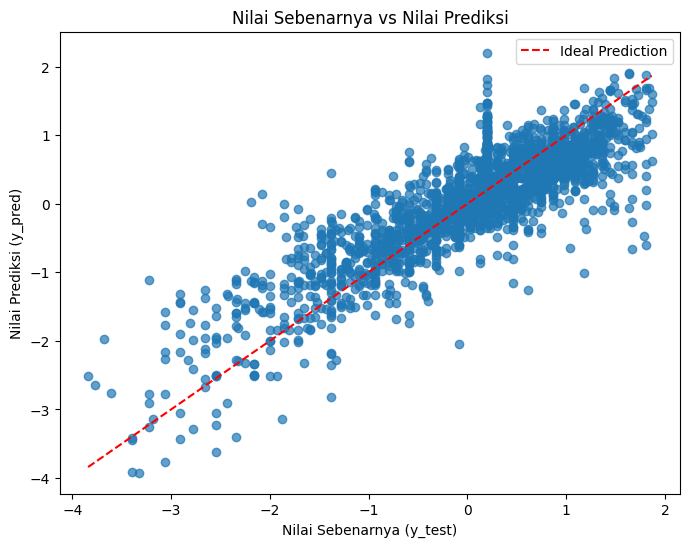

In [ ]:
import matplotlib.pyplot as plt

# Plot Nilai Aktual vs Prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel("Nilai Sebenarnya (y_test)")
plt.ylabel("Nilai Prediksi (y_pred)")
plt.title("Nilai Sebenarnya vs Nilai Prediksi")
plt.legend()
plt.show()


In [ ]:
# Data baru untuk prediksi (masukkan data sesuai dengan format fitur di atas)
new_data = [
    [2020, 15000, 18.0, 1498, 113.0, 250, 1, 0, 0, 1, 1, 4]  # Contoh mobil Diesel, Manual
]

# Pastikan data dalam bentuk DataFrame atau array numpy sebelum prediksi
import pandas as pd
new_data_df = pd.DataFrame(new_data, columns=[
    'year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
    'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
    'transmission_Manual', 'age_of_car'
])

# Prediksi harga jual menggunakan model Linear Regression
new_predictions = lr_model.predict(new_data_df)

# Tampilkan hasil prediksi
print(f"Prediksi harga jual untuk mobil baru: {new_predictions[0]:,.2f}")


Prediksi harga jual untuk mobil baru: 28,592.20


Prediksi dalam Rupiah=28,592.20×15,500=443,169,100IDR